In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, AffinityPropagation, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import fileinput
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from scipy.stats.mstats import winsorize
import hdbscan
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/Customer_Data.csv')
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [3]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [5]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df.shape

(8950, 18)

---

# PART 1 & 2 - EDA & DATA PRE-PROCESSING

For this section, our goal is to clean the data, handle any potential Null values and statistical anomolies that may affect our cluster segmentation models

In [7]:
df.columns = df.columns.str.lower()

We, as a committee, decided to remove the rows with null values (313 from minimum payments and 1 from credit limit) as this represented such a small portion of the dataset at approximately 3.5%.

In [8]:
# Dropping null values as they do not represent a large amount of the dataset

df.dropna(inplace=True)
df.isnull().sum()

cust_id                             0
balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

In [9]:
# Dropped customer ID Variable
df.drop('cust_id', axis=1, inplace=True)
df

# note: this was dropped as it is the only categorical value in the dataset and this would be non-useful for clustering

balance  balance_frequency  purchases  oneoff_purchases  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
4      817.714335           1.000000      16.00             16.00   
5     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8943     5.871712           0.500000      20.90             20.90   
8945    28.493517           1.000000     291.12              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      installments_purchases  cash_advance  purchases_frequency  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
4                       0.00      0.000000             0.083333   
5                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8943                    0.00      0.000000             0.166667   
8945                  291.12      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      oneoff_purchases_frequency  purchases_installments_frequency  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
...                          ...                               ...   
8943                    0.166667                          0.000000   
8945                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
4                   0.000000                 0              1        1200.0   
5                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8943                0.000000                 0              1         500.0   
8945                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         payments  minimum_payments  prc_full_payment  tenure  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
4      678.334763        244.791237          0.000000      12  
5     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8943    58.644883         43.473717          0.000000       6  
8945   325.594462         48.886365          0.500000       6  
8947    81

## EXPLORATORY DATA ANALYSIS

EDA will now be performed to discover other potential relationships and patterns that may have an impact on clustering models. As well, we may possibly observe patterns that we can infer to specific purchasing behaviours or characteristics of types of credit card customers.

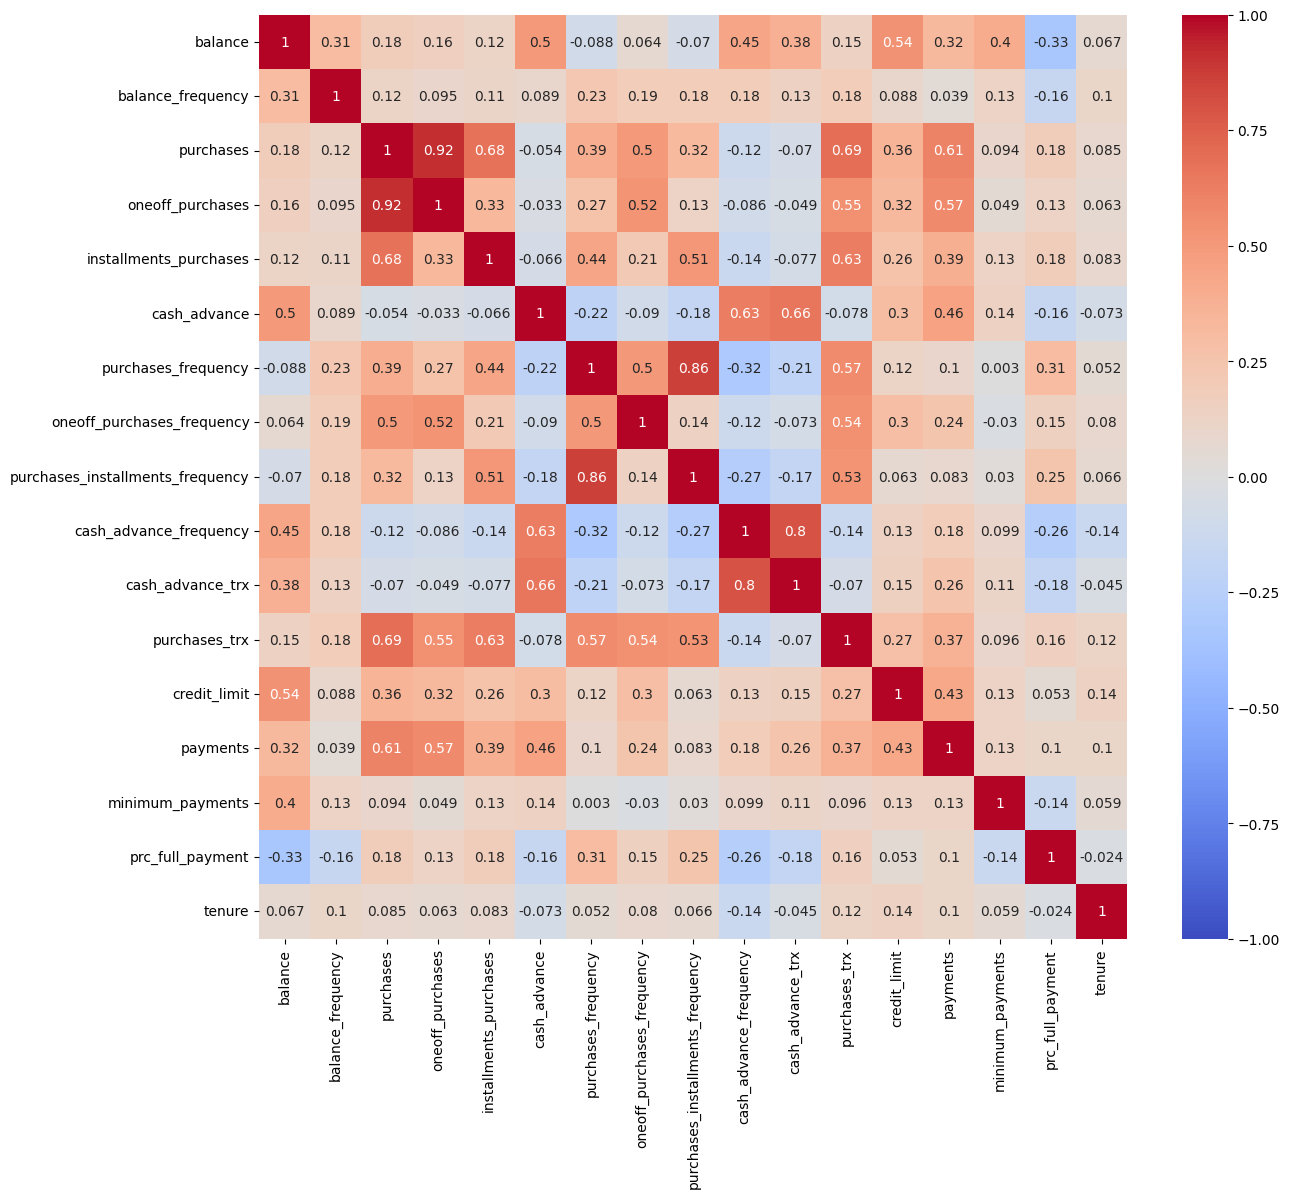

In [10]:
# Generate a correlation matrix to observe potential correlations between all the variables

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

Observing the correlation matrix above, we can see there are multiple variables which result in a moderate to high correlation with one another. More specifically, there relationships include:
- Purchases:
    - oneoff_purchases:
        - This variable is almost perfectly correlated with the purchases variable with a score of 0.92. A potential reason may be due to a majority of users in dataset who's total amount of purchases consist of only one off purchases.
    - installments_purchases:
        - For the relationship between purchases and installment_purchases, we can see an moderately high correlation score of 0.68 which may indicate a high volume of credit card customers are making their purchases through installments.
    - purchases_trx:
        - Indicating the number of purchase transactions the credit card customers have initiated. Having a score of 0.69, this is generally due to the relationship where more transactions will increase the purchase total amount.
    - payments:
        - As we are dealing with credit card customers, it is typical this relationship has a moderately high correlation as the more purchases that are made, the customer has to payback their credit card after the fact.

- Cash Advance:
    - cash_advance_frequency and cash_advance_trx
        - Both of these variables are expected to have a higher correlation to the cash_advance variable due to relation of recording the amount of times a credit card customer actions a cash advance. 

- Credit Limit and Balance:
    - For this relationship having a moderate correlation score of 0.54, we can infer generally those who have higher balances would have higher credit limits.


Understanding these relationships, we can deduce that there an effect of multicollinearity due to the large overlap and redundency between the variables. Most specifically, this is due to the variables in relation to credit purchases. In order to combat this, Dimensionality reduction will be effective in decreasing redundency and complexity when performing our model analysis. By either removing or mitigating the impact of those elements, this can aid in reducing the overall noise from the dataset. Additionally, this will enable the clustering algorithms perform greater and generate clearer and more distinct clusters for determining the different behaviours between different types of credit card customers.

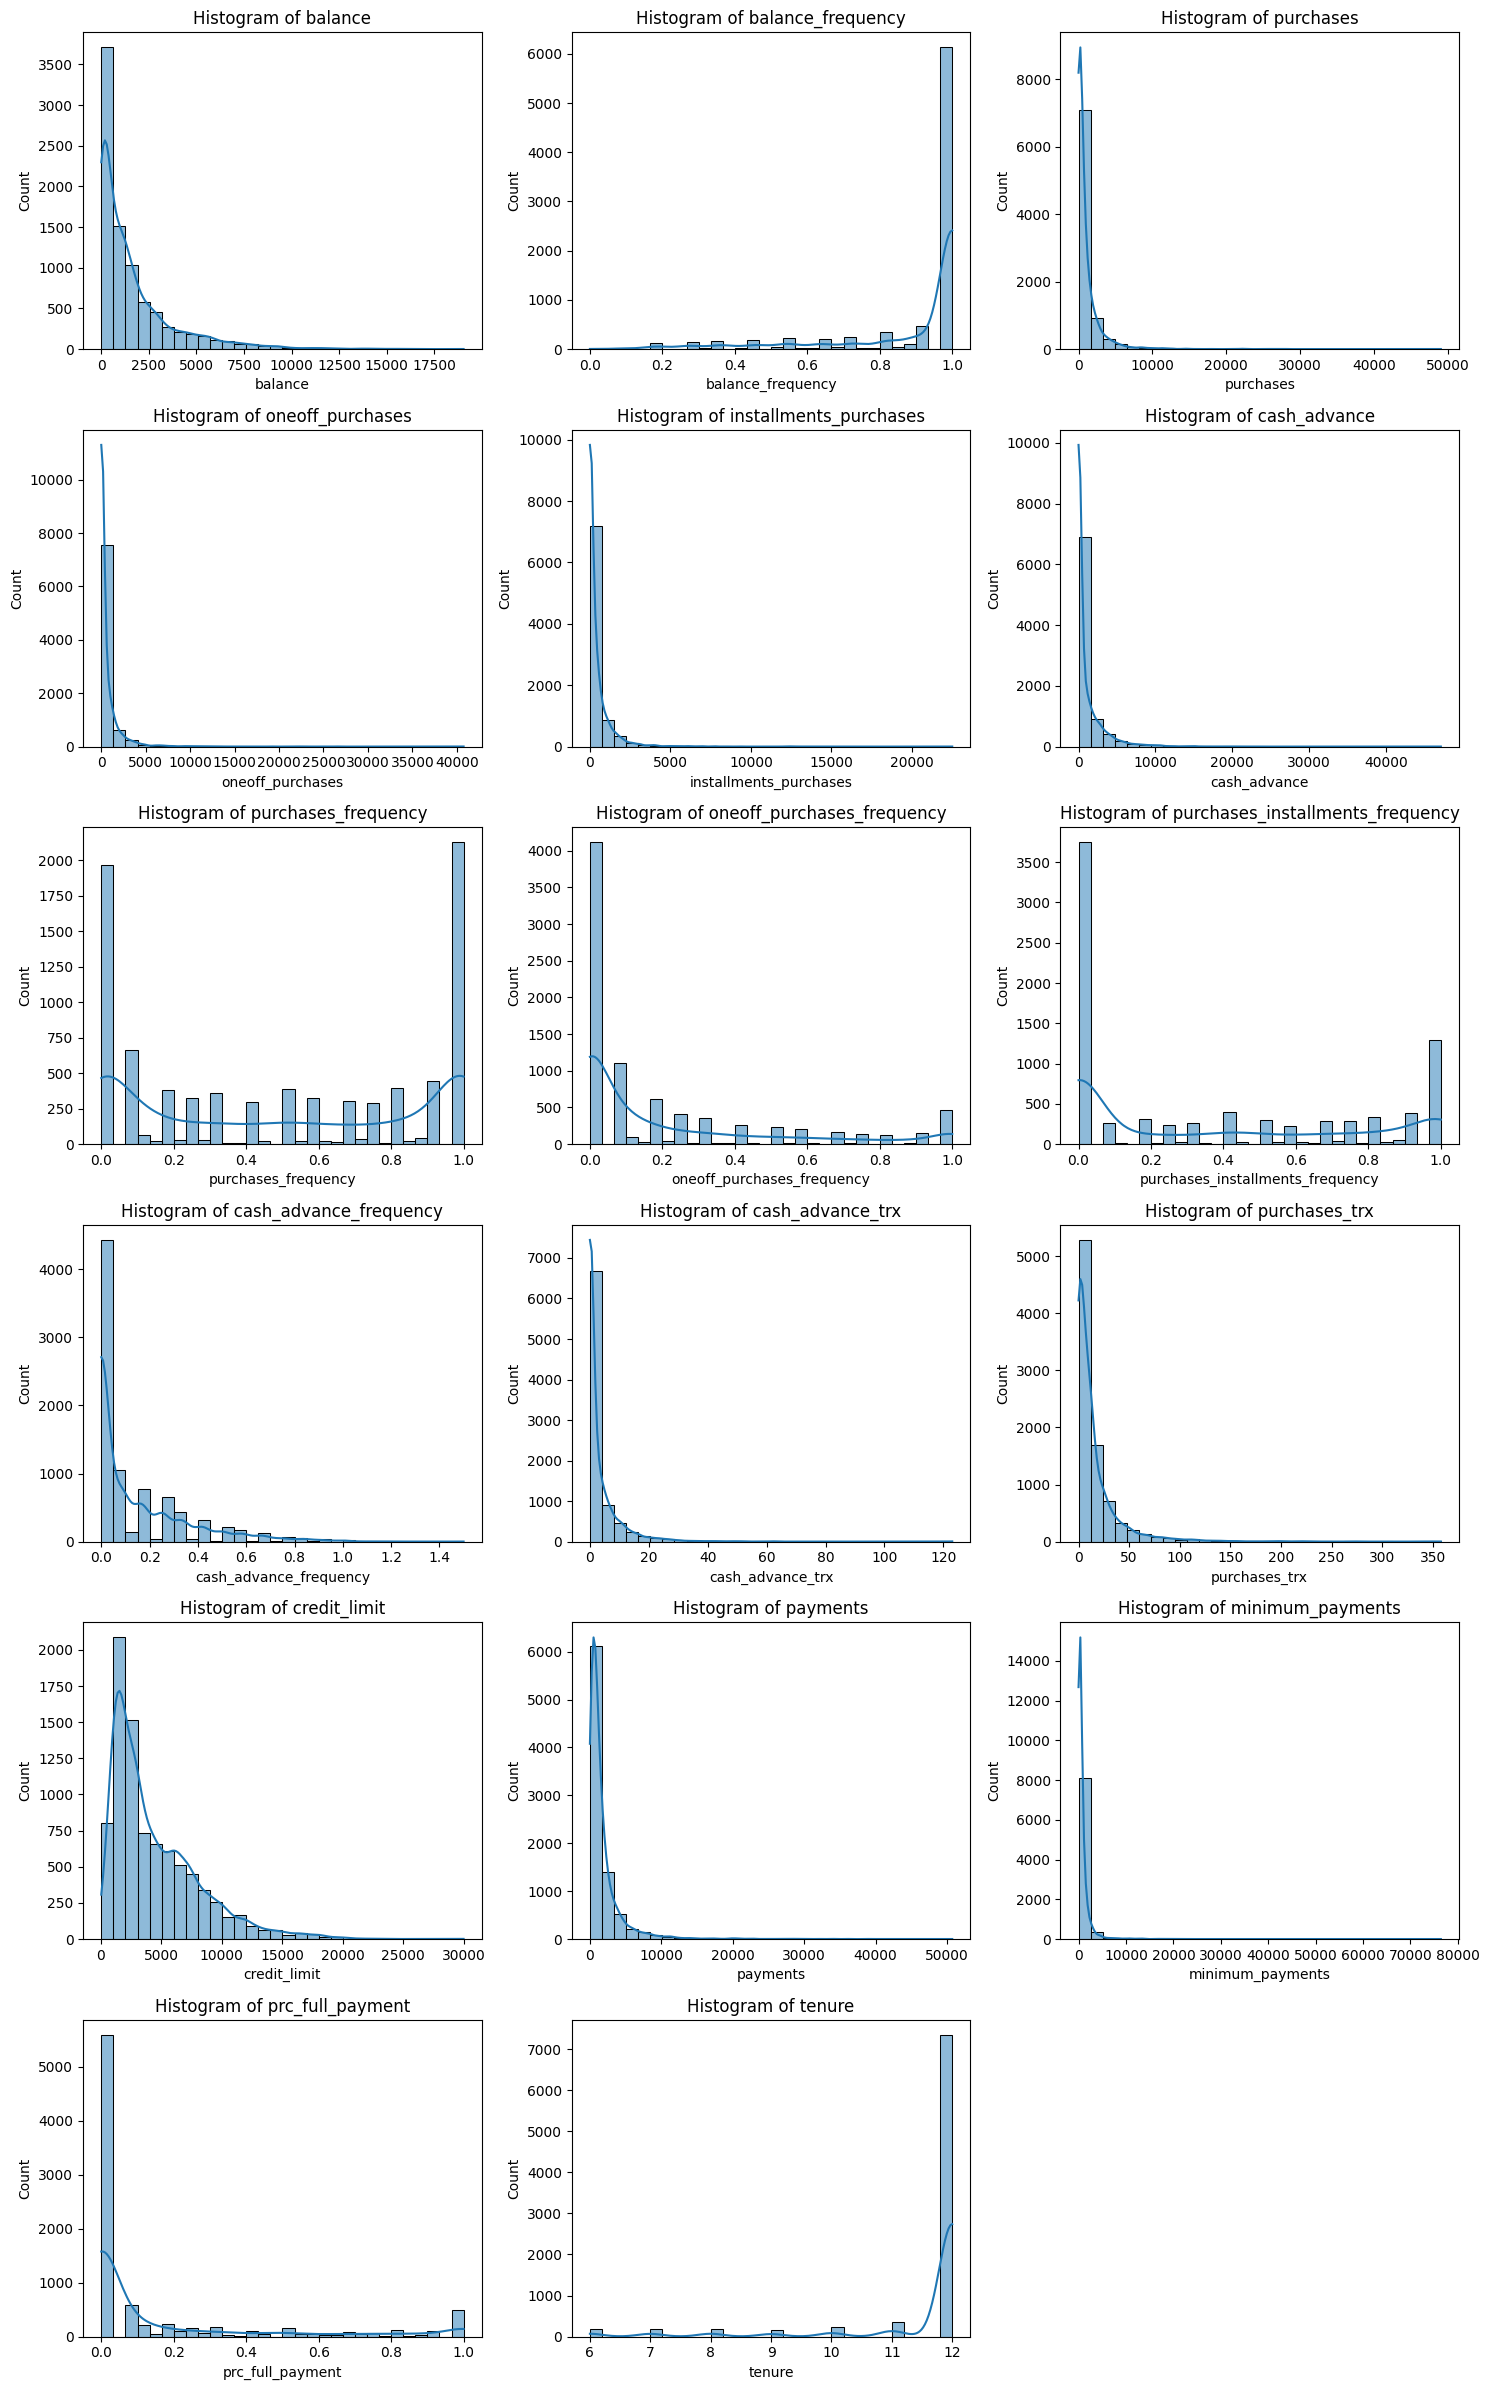

In [11]:
# Creating a grid of histograms for each column

num_features = len(df.columns)
num_cols = 3  # Number of columns for the grid
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten axes for easy iteration, in case it's a 2D array
axes = axes.flatten()

# Create a histogram for each feature
for i, col in enumerate(df.columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

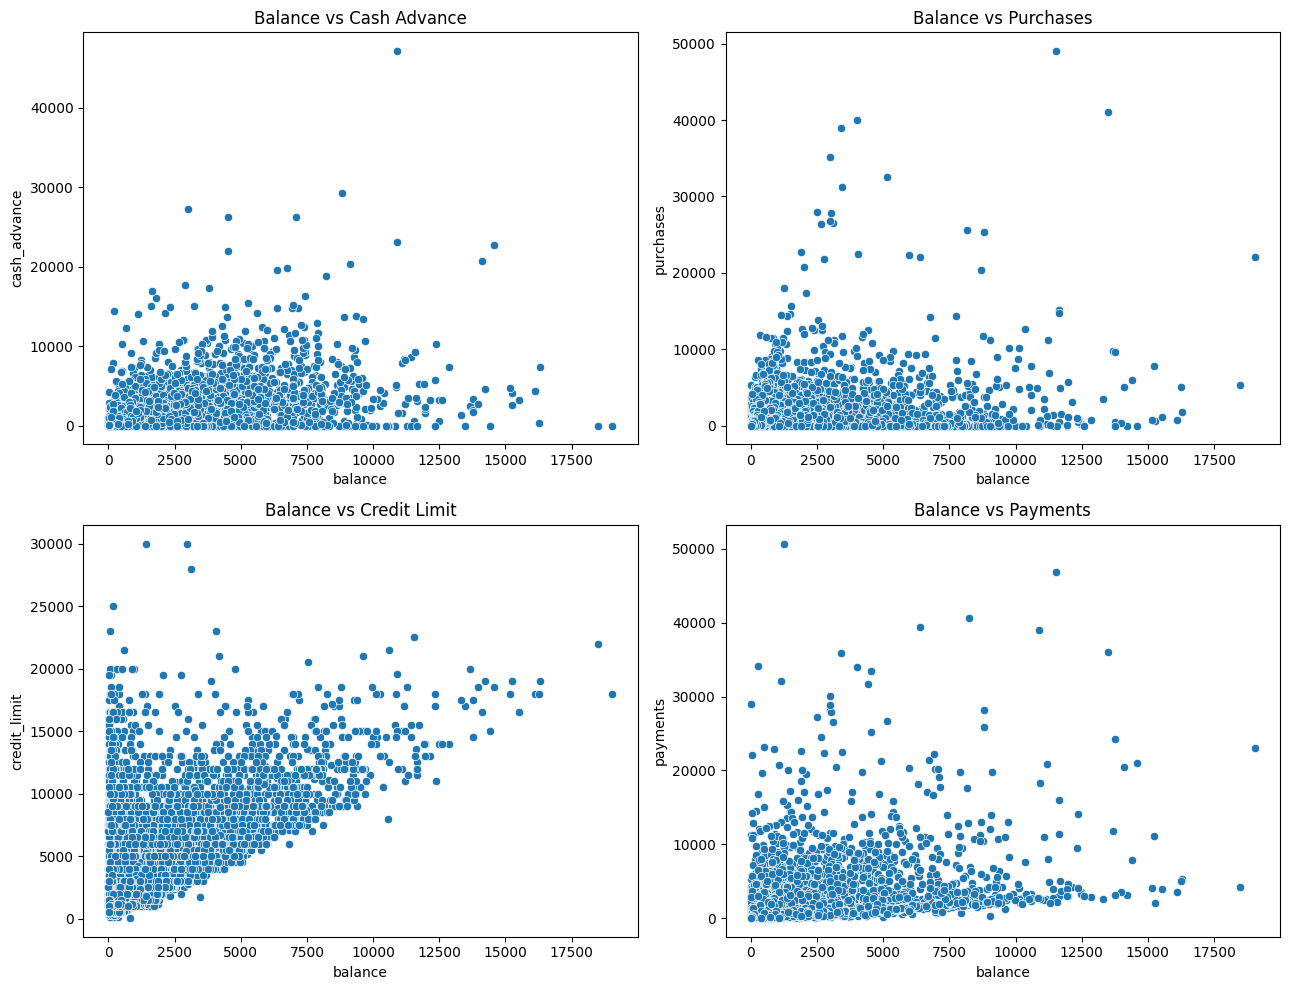

In [12]:
# Checking the relationship between balance and other variables 
fig, axes = plt.subplots(2, 2, figsize=(13, 10))

# Flatten the axes to make it easier to iterate
axes = axes.flatten()

sns.scatterplot(x=df['balance'], y=df['cash_advance'], ax=axes[0])
sns.scatterplot(x=df['balance'], y=df['purchases'], ax=axes[1])
sns.scatterplot(x=df['balance'], y=df['credit_limit'], ax=axes[2])
sns.scatterplot(x=df['balance'], y=df['payments'], ax=axes[3])

# Titles for each subplot
axes[0].set_title("Balance vs Cash Advance")
axes[1].set_title("Balance vs Purchases")
axes[2].set_title("Balance vs Credit Limit")
axes[3].set_title("Balance vs Payments")

plt.tight_layout()
plt.show()

Observing the histograms and scatter plots, we do not observe any statistical anomolies or patterns that would have a strong impact on our model other than the outliers.

Generating box plot to detect outliers between the various models which may have a strong influence on our cluster models

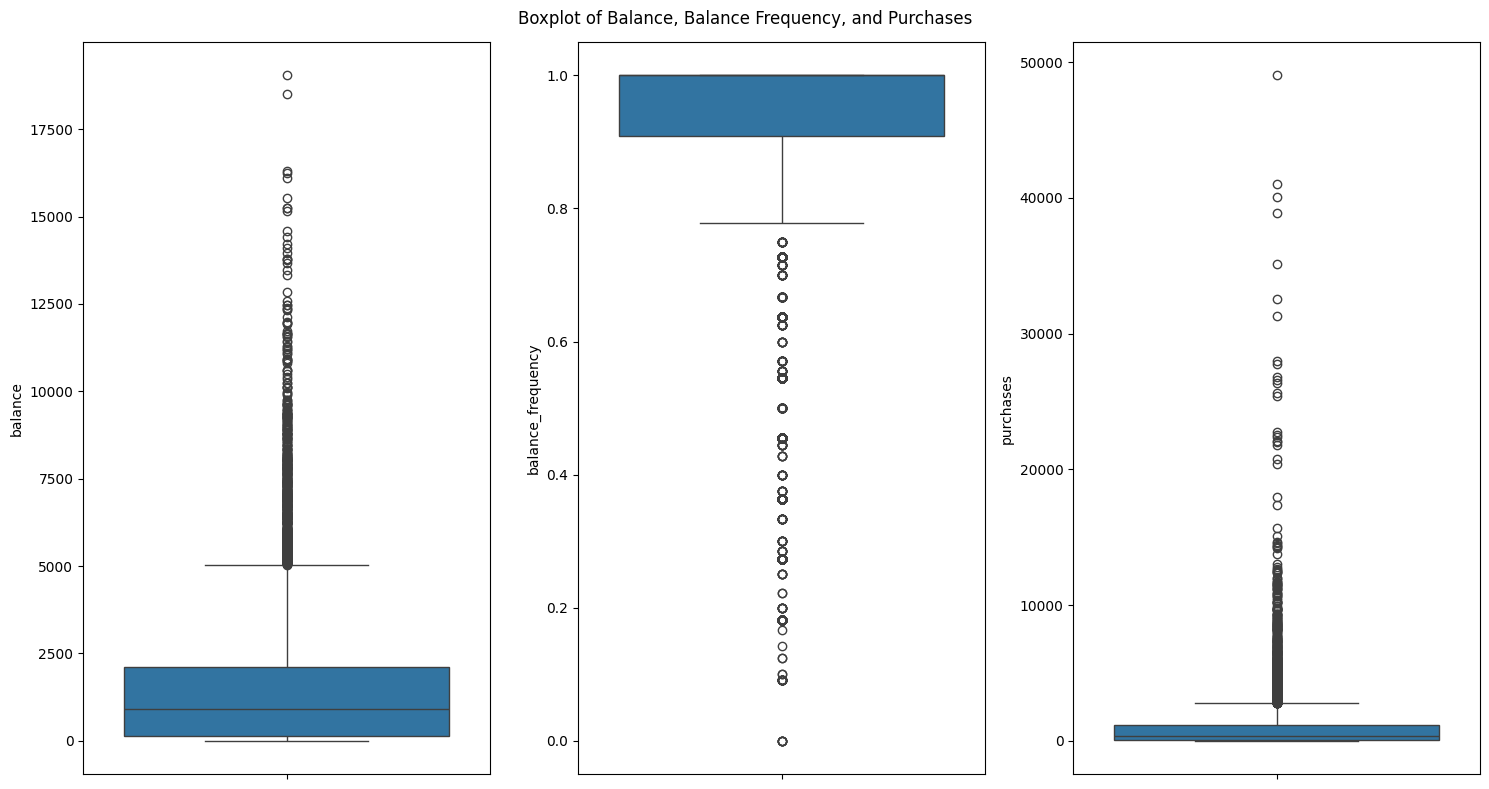

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))

sns.boxplot(y=df['balance'], ax=axes[0])
sns.boxplot(y=df['balance_frequency'], ax=axes[1])
sns.boxplot(y=df['purchases'], ax=axes[2])

plt.suptitle('Boxplot of Balance, Balance Frequency, and Purchases', fontsize=12, ha='center')

plt.tight_layout()
plt.show()

In relation to the box plots above, we can observe both balances and purchases have a large volume of outliers that may have a significant impact when generating our clusters. 
- For balance specifically, the mean is only around 1500 but there is a multitude of credit card customers that far exceed the balance which leads to the true mean potentially being much lower if the those outliers were removed. 
- Additionally, we can observe the there is a large density of credit card customer outliers who's total volume of purchases made far exceed the average purchase amount per credit card user

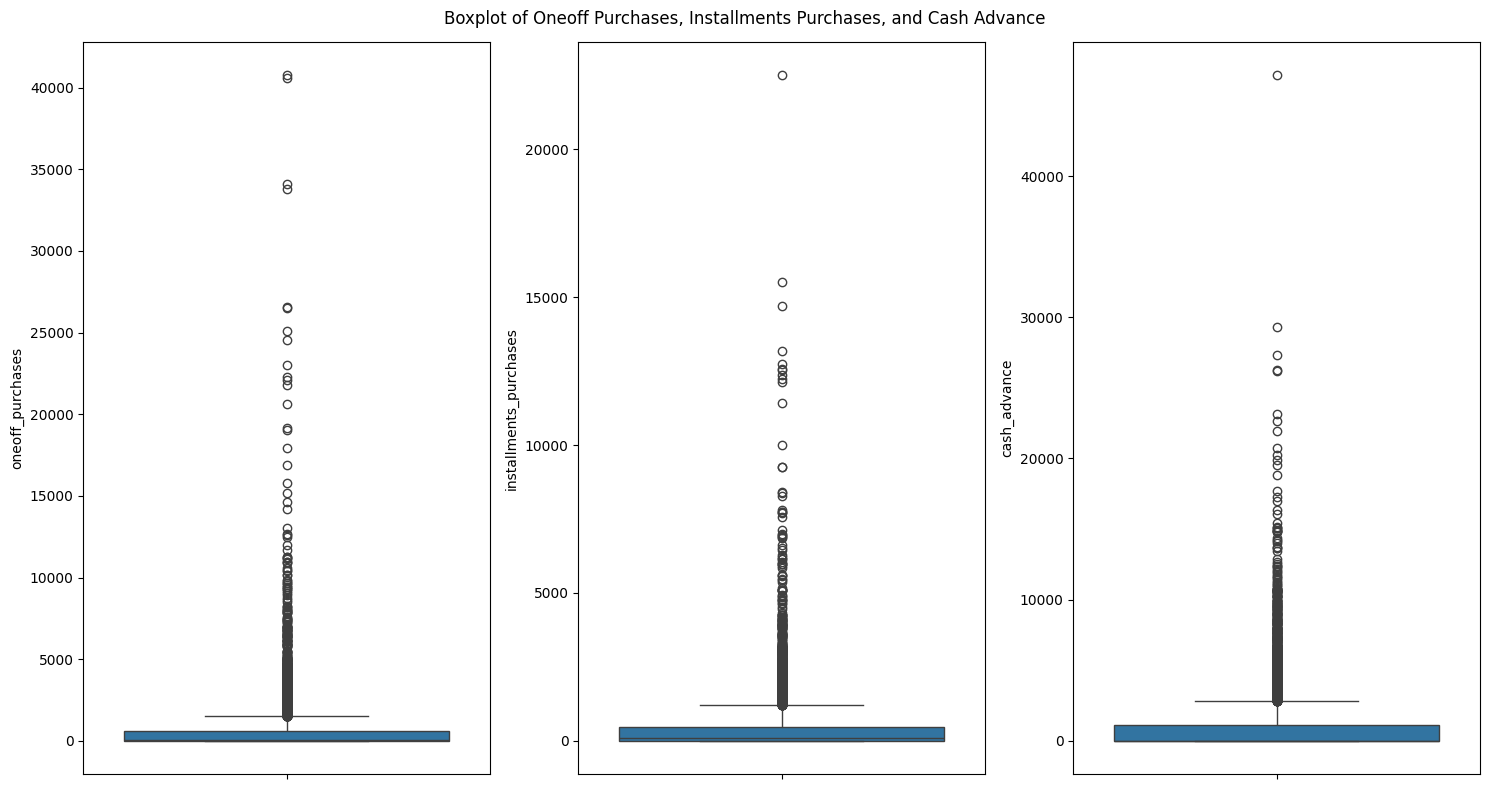

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))  

sns.boxplot(y=df['oneoff_purchases'], ax=axes[0])
sns.boxplot(y=df['installments_purchases'], ax=axes[1])
sns.boxplot(y=df['cash_advance'], ax=axes[2])

plt.suptitle('Boxplot of Oneoff Purchases, Installments Purchases, and Cash Advance', fontsize=12, ha='center')

plt.tight_layout()
plt.show()

Regarding the boxplots visualized above, we can observe the multitude of outliers that if not addressed will create inaccuracy within our clustering models. With the outliers representing credit card customers that have made one off purchases, installment purchases, and cash advance amounts, we can look to carefully decide if the outliers should be removed or winsorized in order to reduce its impact. Specifically, we will attempt to target those observations that completely deviate and do not represent the mean characteristics and behaviours of the typical credit card customer.

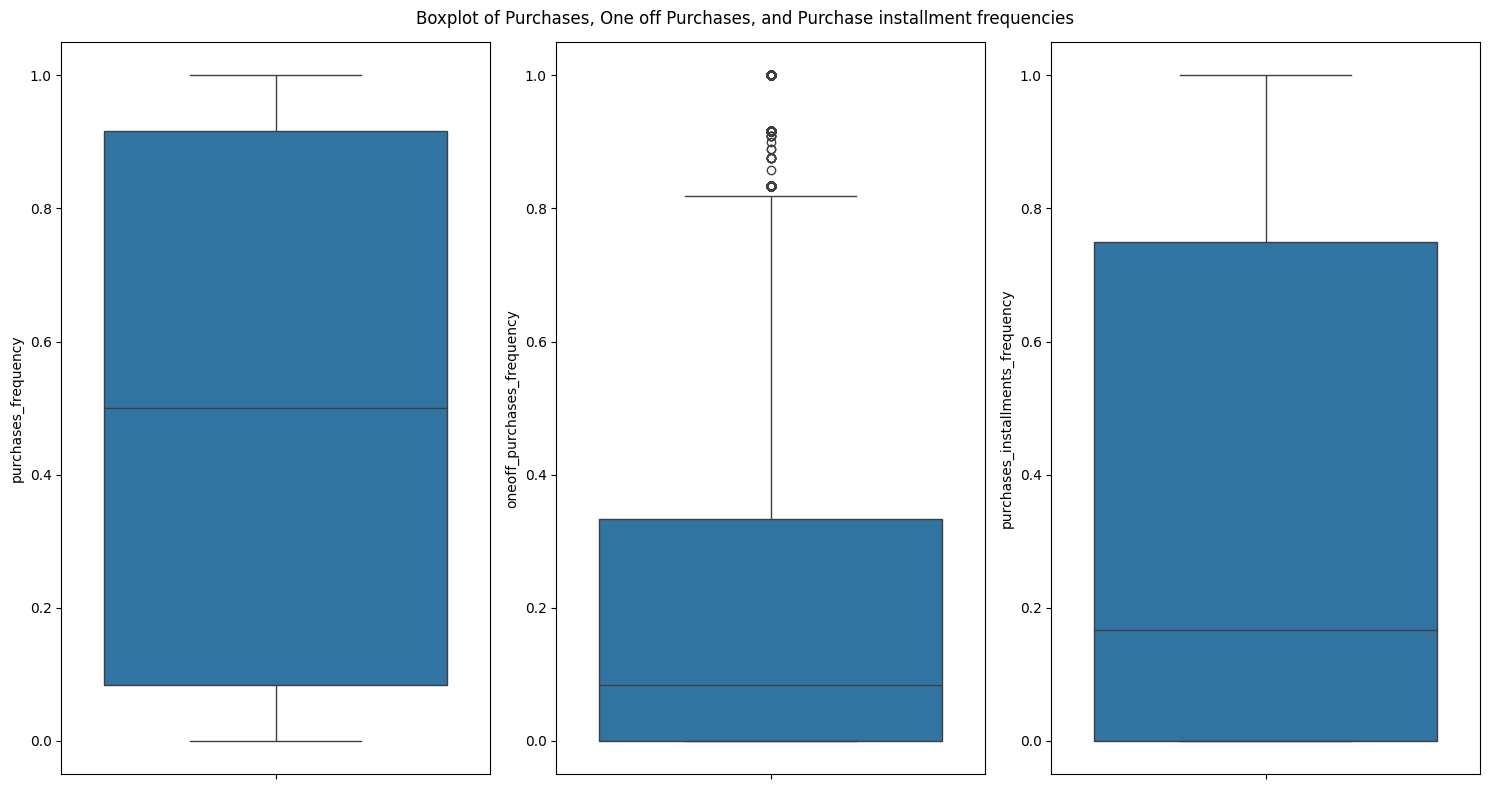

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))  

sns.boxplot(y=df['purchases_frequency'], ax=axes[0])
sns.boxplot(y=df['oneoff_purchases_frequency'], ax=axes[1])
sns.boxplot(y=df['purchases_installments_frequency'], ax=axes[2])

plt.suptitle('Boxplot of Purchases, One off Purchases, and Purchase installment frequencies', fontsize=12, ha='center')

plt.tight_layout()
plt.show()

For the boxplots above representing the frequencies of purchases, one-off purchases and purchase installments, we can observe that the columns are normalized and there are a miniscule amount of outliers. But as we observed above in the correlation matrix, variables such as purchases frequency and one off purchases have a high degree of correlation with other variables in our dataset. In order to reduce the effect of multicollinearity and noise, we will look to potentially drop the variables from our clustering models.

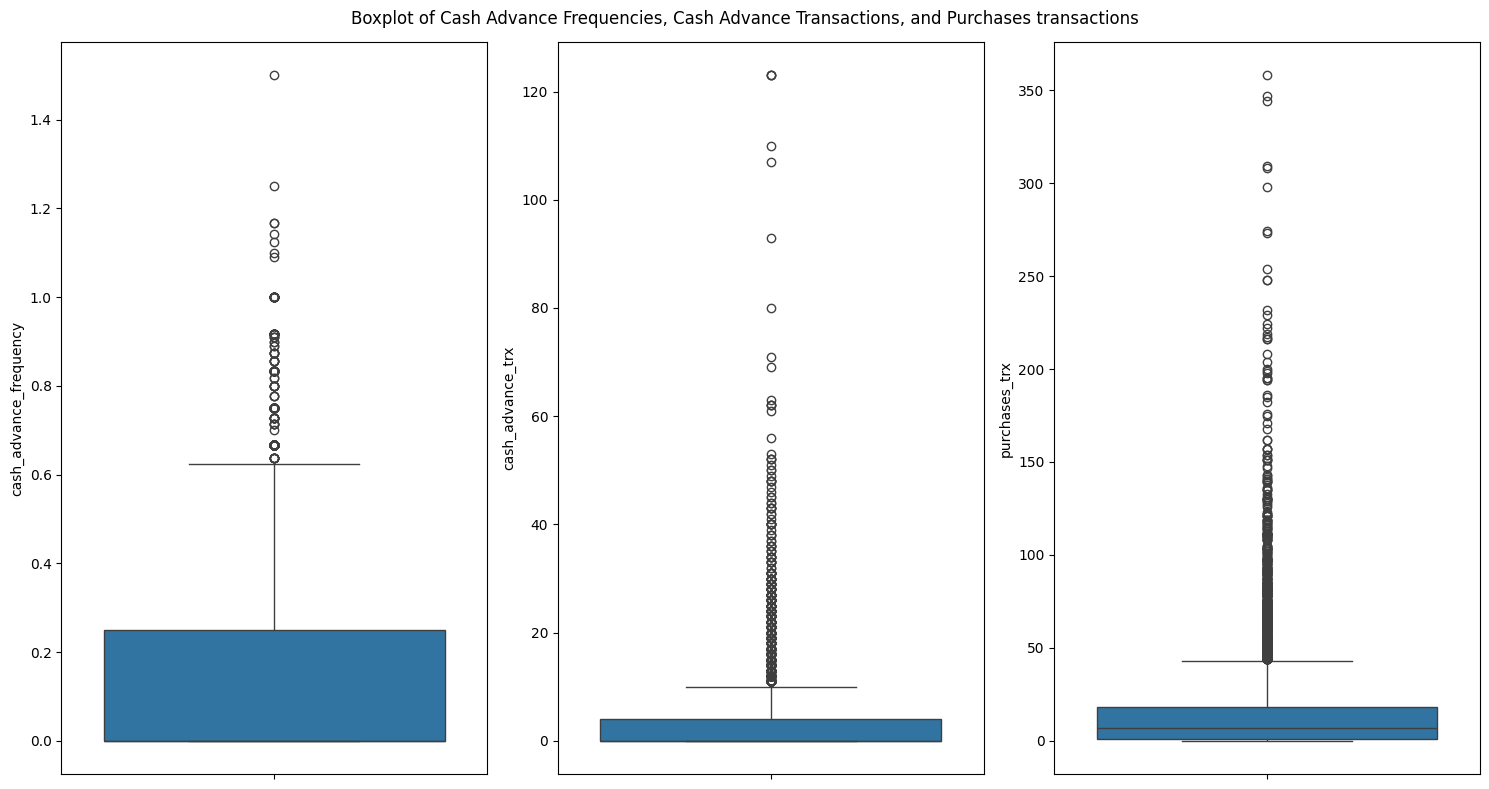

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))  

sns.boxplot(y=df['cash_advance_frequency'], ax=axes[0])
sns.boxplot(y=df['cash_advance_trx'], ax=axes[1])
sns.boxplot(y=df['purchases_trx'], ax=axes[2])

plt.suptitle('Boxplot of Cash Advance Frequencies, Cash Advance Transactions, and Purchases transactions', fontsize=12, ha='center')

plt.tight_layout()
plt.show()

As observed from the box plots above, we can see the number of cash advance transactions and purchases transactions have a large volume of outliers that if kept, we believe will have a negative impact in terms of performance for our clustering model. As the two transaction variables are highly correlated with "cash advance" and "purchases", we will most likely drop them as well.

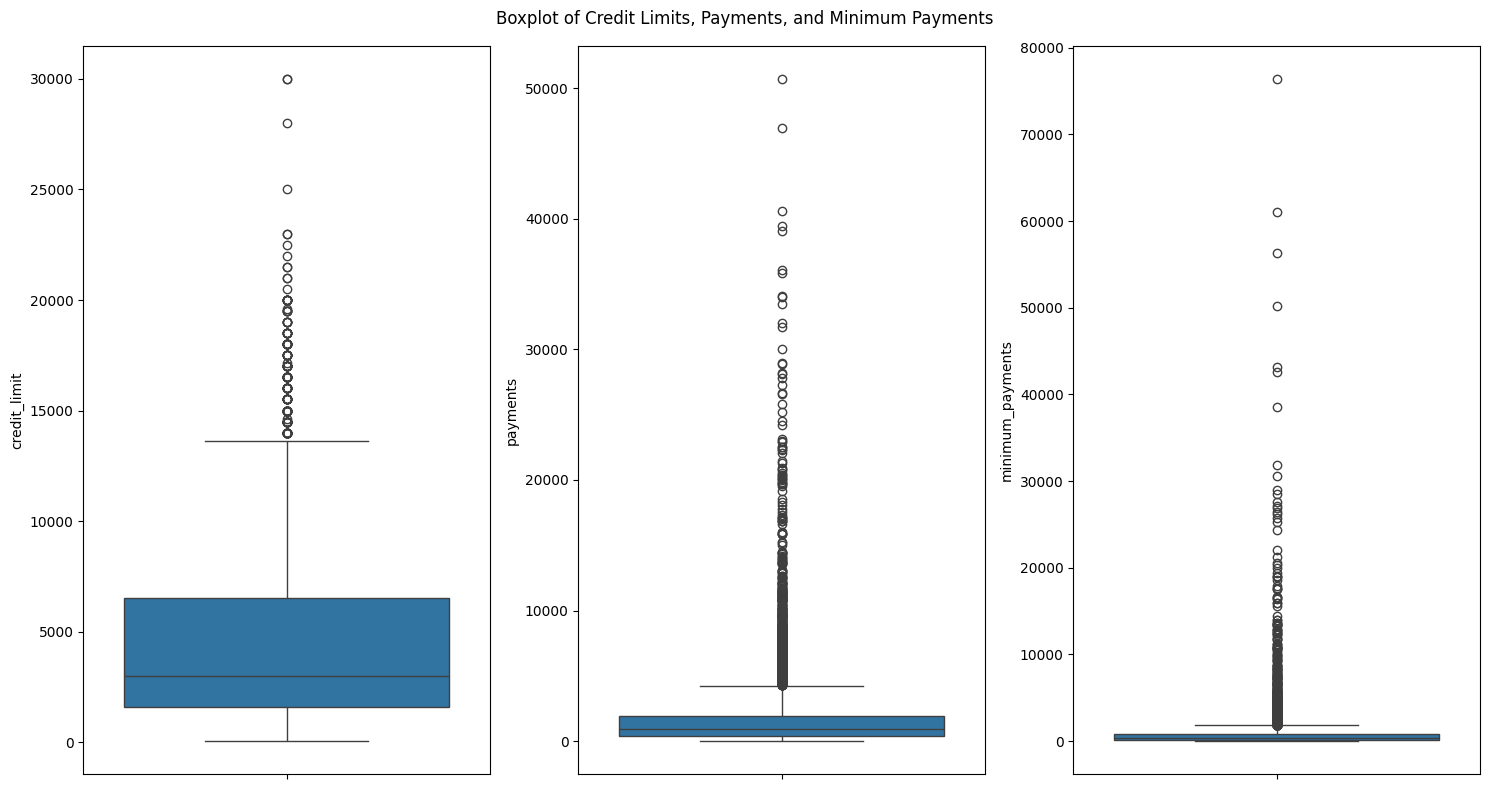

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))  

sns.boxplot(y=df['credit_limit'], ax=axes[0])
sns.boxplot(y=df['payments'], ax=axes[1])
sns.boxplot(y=df['minimum_payments'], ax=axes[2])

plt.suptitle('Boxplot of Credit Limits, Payments, and Minimum Payments', fontsize=12, ha='center')

plt.tight_layout()
plt.show()

For the boxplots visualized above in relation to credit limits, bill payments, and minimum payment amounts, we can observe the large scale of outliers for the payments and minimum payments variables. As these columns have moderately high correlations but a not strong enough correlation with puchases and one off purchases, we will most likely winsorize them to keep the high value relationship of those credit card customers within our models but reduce the large impact it may have on our clustering algorithms.

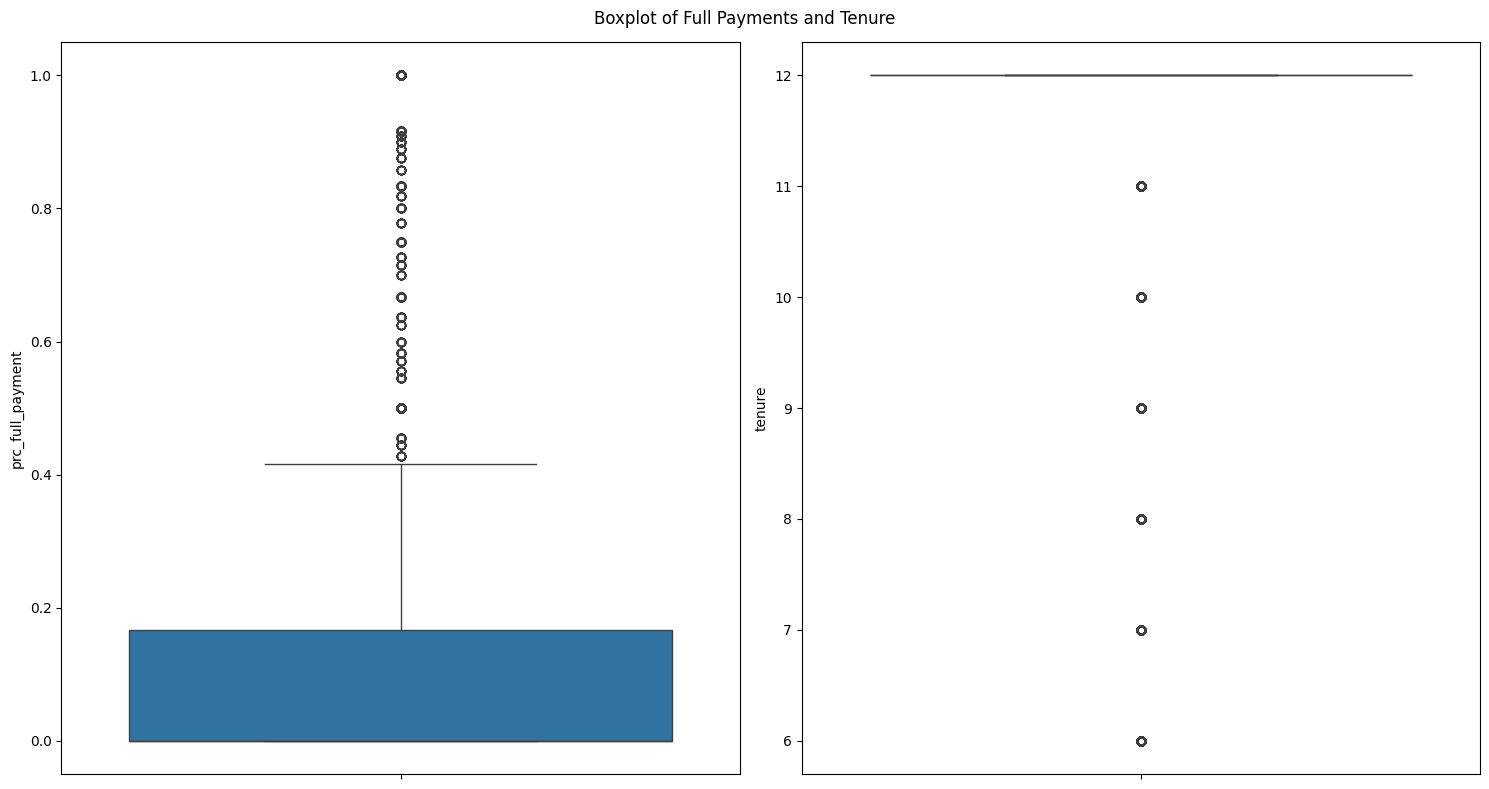

In [18]:
# Box Plots of customer records of full payments and tenure

fig, axes = plt.subplots(1, 2, figsize=(15, 8))  

sns.boxplot(y=df['prc_full_payment'], ax=axes[0])
sns.boxplot(y=df['tenure'], ax=axes[1])

plt.suptitle('Boxplot of Full Payments and Tenure', fontsize=12, ha='center')

plt.tight_layout()
plt.show()

For the last pair of boxplots,  we did not see any large variations of outliers in relation to the percentage of users who have made full payments and how long the customers have been credit card holders. As for tenure, since we can not identify the values with the numbers representing months or a different time period, we do not want to make assumptions and therefore will most likely drop the variable also due to its low statistical significance with other variables. 

---

## Data Pre-Processing

After our EDA process, we have established a few steps that must be actioned in order to ensure accurate representation of the variables in accordance with our clustering model performance.

Steps:
- Winsorization of key variables must be performed to reduce the impact of any outliers
- Standardization with majority of the dataset will most likely be neccessary to handle outliers that that may skew our clustering

### Winsorization

After observing the various outliers amongst our variables to be included in our cluster models, we made the decision to winsorize them as to keep the statistical significance of the observations and at the same time reduce its influence skewing how our models perform.


Due to the scale of outliers, we chose 8 variables to perform our winsorization on by capping to the top 1% of credit card customers to a ceiling in order to better capture more accurate imapcts of the variables on our clustering algorithms.

The main reason for manually winsorizing our selected variables was to cap the extreme values while still maintaining the majority of the data points. Through winsorization, we can effectively reduce the influence of extreme values that may distort our clsuter results.

In [19]:
# Create a copy of the original DataFrame to keep all columns
df_winsorized = df.copy()

# Apply winsorization (clipping) to specific columns
df_winsorized['purchases'] = np.clip(df['purchases'], None, 10000)
df_winsorized['balance'] = np.clip(df['balance'], None, 15000)
df_winsorized['cash_advance'] = np.clip(df['cash_advance'], None, 25000)
df_winsorized['payments'] = np.clip(df['payments'], None, 30000)
df_winsorized['minimum_payments'] = np.clip(df['minimum_payments'], None, 35000)
df_winsorized['installments_purchases'] = np.clip(df['installments_purchases'], None, 14500)
df_winsorized['credit_limit'] = np.clip(df['credit_limit'], None, 25000)
df_winsorized['oneoff_purchases'] = np.clip(df['oneoff_purchases'], None, 30000)

# Remove rows with null values
df_winsorized = df_winsorized.dropna()

# Verify the changes by displaying a few rows
print(f"Shape after removing null rows: {df_winsorized.shape}")
df_winsorized.head()

Shape after removing null rows: (8636, 17)


balance  balance_frequency  purchases  oneoff_purchases  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   installments_purchases  cash_advance  purchases_frequency  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      payments  minimum_payments  prc_full_payment  tenure  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12

Dropping Features to reduce high dimensionality issues

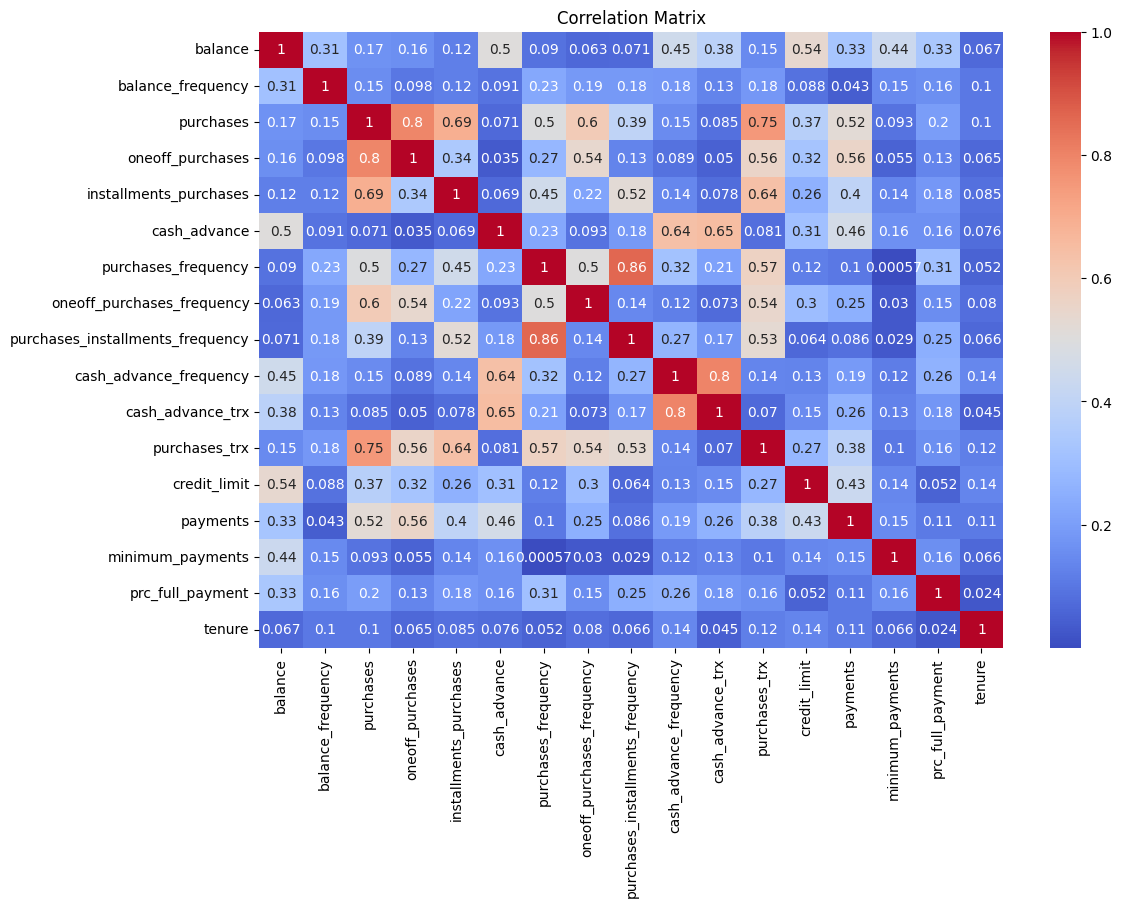

                              level_0                           level_1  \
82                purchases_frequency  purchases_installments_frequency   
108            cash_advance_frequency                  cash_advance_trx   
31                          purchases                  oneoff_purchases   
39                          purchases                     purchases_trx   
32                          purchases            installments_purchases   
..                                ...                               ...   
46                   oneoff_purchases                      cash_advance   
97         oneoff_purchases_frequency                  minimum_payments   
105  purchases_installments_frequency                  minimum_payments   
135                  prc_full_payment                            tenure   
88                purchases_frequency                  minimum_payments   

     correlation  
82      0.862338  
108     0.799593  
31      0.796890  
39      0.751884  
32  

In [20]:
# Calculate the correlation matrix
corr_matrix = df_winsorized.corr().abs()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Extract the upper triangle of the correlation matrix without the diagonal
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Create a list of correlation pairs sorted by absolute correlation, from highest to lowest
sorted_corr_pairs = (
    upper_triangle.stack()
    .reset_index()
    .rename(columns={0: 'correlation'})
    .sort_values(by='correlation', ascending=False)
)

print(sorted_corr_pairs)

In [21]:
# Drop the specified columns from the dataset
df_winsorized = df_winsorized.drop(['purchases_installments_frequency', 'cash_advance_trx', 'oneoff_purchases',
                                    'purchases_trx', 'tenure'], axis=1)

# Verify the changes by displaying the new shape and a few rows
print(f"Shape after dropping columns: {df_winsorized.shape}")
df_winsorized.head()

Shape after dropping columns: (8636, 12)


balance  balance_frequency  purchases  installments_purchases  \
0    40.900749           0.818182      95.40                   95.40   
1  3202.467416           0.909091       0.00                    0.00   
2  2495.148862           1.000000     773.17                    0.00   
4   817.714335           1.000000      16.00                    0.00   
5  1809.828751           1.000000    1333.28                 1333.28   

   cash_advance  purchases_frequency  oneoff_purchases_frequency  \
0      0.000000             0.166667                    0.000000   
1   6442.945483             0.000000                    0.000000   
2      0.000000             1.000000                    1.000000   
4      0.000000             0.083333                    0.083333   
5      0.000000             0.666667                    0.000000   

   cash_advance_frequency  credit_limit     payments  minimum_payments  \
0                    0.00        1000.0   201.802084        139.509787   
1                    0.25        7000.0  4103.032597       1072.340217   
2                    0.00        7500.0   622.066742        627.284787   
4                    0.00        1200.0   678.334763        244.791237   
5                    0.00        1800.0  1400.057770       2407.246035   

   prc_full_payment  
0          0.000000  
1          0.222222  
2          0.000000  
4          0.000000  
5          0.000000

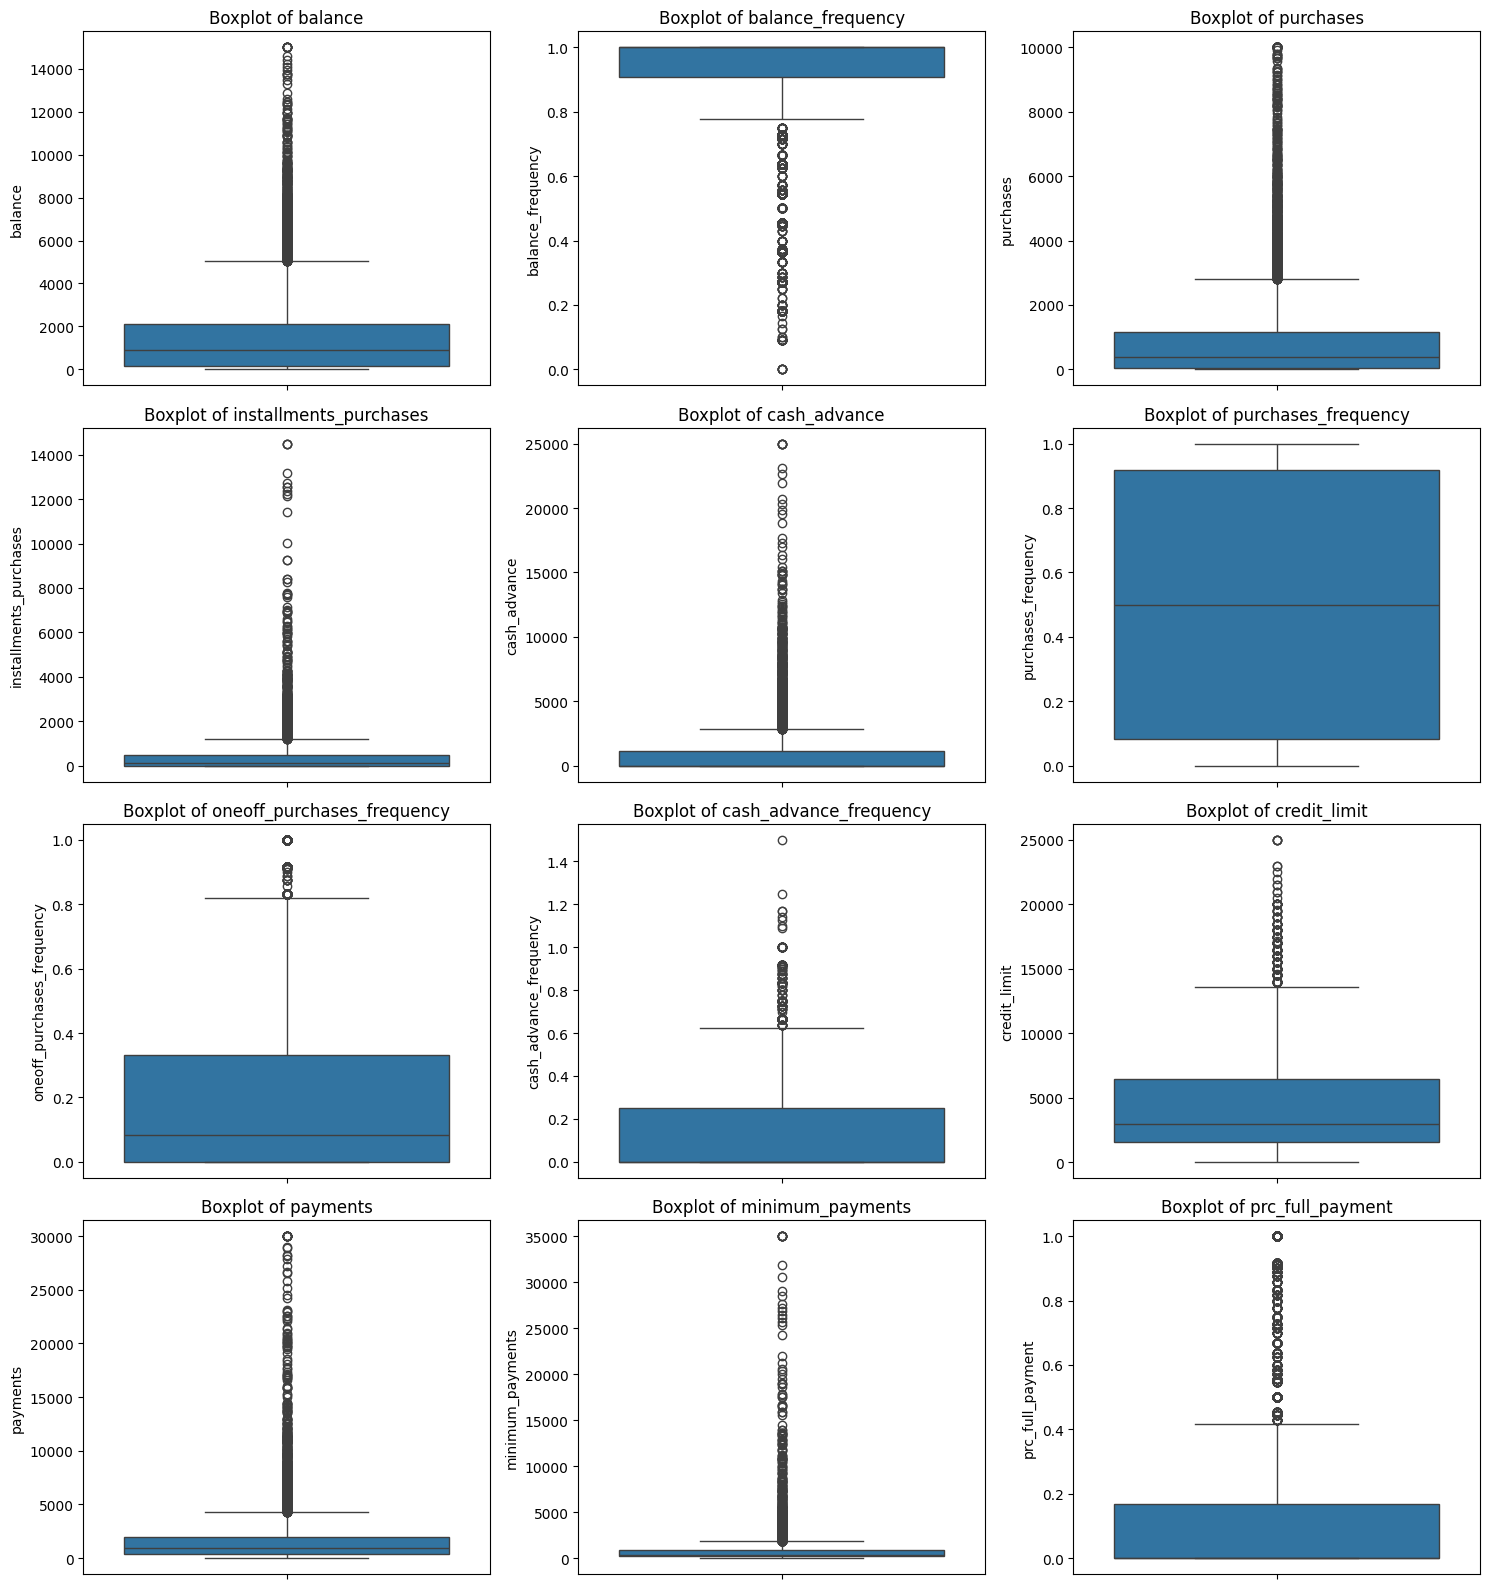

In [22]:
# Determine the number of features and set up the plot grid
num_features = len(df_winsorized.columns)
num_cols = 3  # Number of columns for the grid
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten axes for easy iteration, in case it's a 2D array
axes = axes.flatten()

# Create a boxplot for each feature
for i, col in enumerate(df_winsorized.columns):
    sns.boxplot(data=df_winsorized[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Scaling

In [23]:
minmax_scaler = MinMaxScaler()
minmax_df = minmax_scaler.fit_transform(df_winsorized)

standard_scaler = StandardScaler()
standard_df = standard_scaler.fit_transform(df_winsorized)

robust_scaler = RobustScaler()
robust_df = robust_scaler.fit_transform(df_winsorized)

---

# PART 3 - CLUSTERING ALGORITHMS

- Implement at least three different clustering algorithms of your choice (e.g., K-Means, Hierarchical, DBSCAN). You can try any algorithms available in sklearn.
- Use Elbow method, Silhouette analysis, or other techniques to determine the optimal number of clusters.
- Discuss each method, and select the most appropriate

Prior to clustering, 3 scalers (MinMax, Standard, and Robust) were used on the winsorized dataframe. In addition to this, each clustering algorithm will have an optimization code ran on it to ensure find the best parameters to maximize its silhouette score. The ways the scaled data was optimized would vary depending on the parameters required for the specific algorithm. For instance, the elbow method was utilized for K-Means. Following this, the scaled data with the highest silhouette score following optimization will have PCA set to retain 85% variance applied to it and its clusters visualized using the parameters from the preceding code. One important note is that for each optimization code, there was a wider range selected during the initial testing. However, once the best parameters were found, these ranges were shortened for subsequent re-runs to reduce the run times. This was conducted as some optimization codes took well over 10 minutes to run but after shortening the ranges and implementing early stopping, all of these optimization codes took well under 5 minutes to produce an output. Additionally, the optimization code had discarded results for scores with 1 cluster to increase efficiency. What makes this so important is because the subsequent modelling code would automatically pick the scaled data that performed the best.

The following algorithms were tested: K-Means, DBSCAN, HDBSCAN, Mean Shift, Expectation Maximization (GMM), Agglomerative Clustering, and Affinity Propagation.

Under each model's visualization, there will be a markdown with an analysis on the optimization process and overall results.

### Model Selection Criteria
What will be the key criteria in model selection is having distinct clusters with a strong silhouette score. However, in addition it is imperative to have the number of clusters be in the 2-5 range. This is because in terms of later segmenting the audience, if there are too many customers, there would be too many segmentation; in turn, this would make each recommendation or actionable insight less impactful as it would address to small of a portion of the demographic.

## K-MEANS
### Optimization

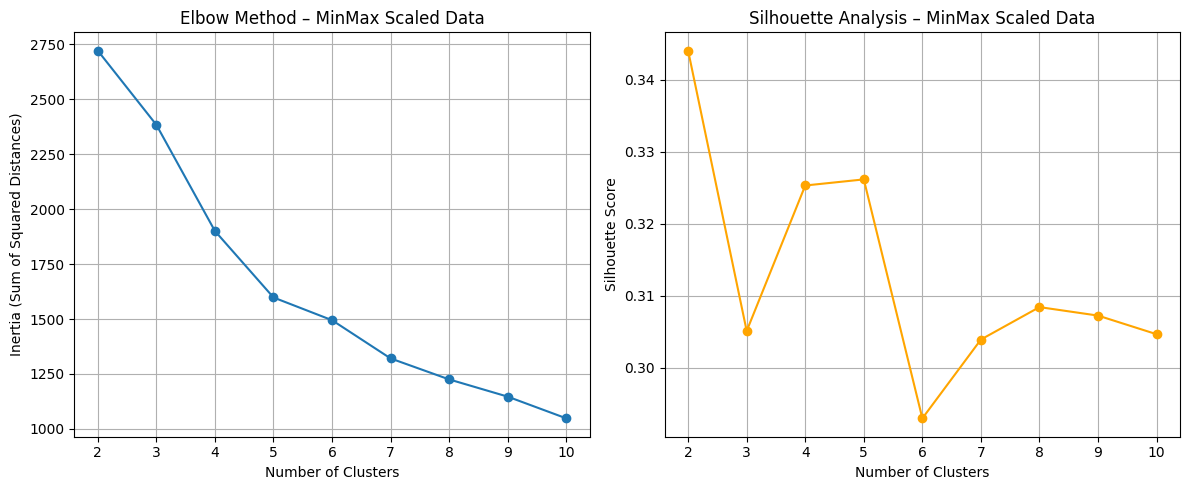

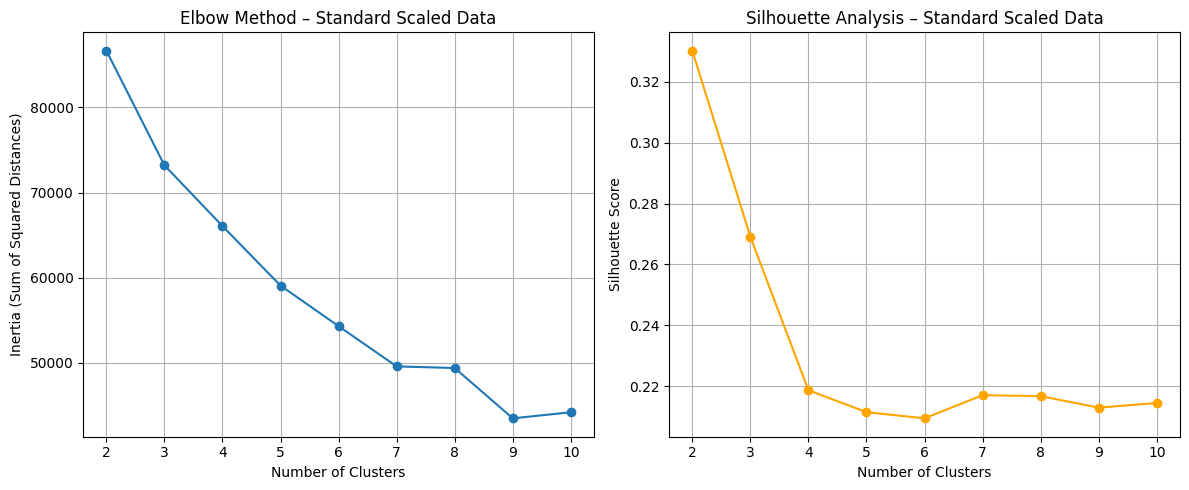

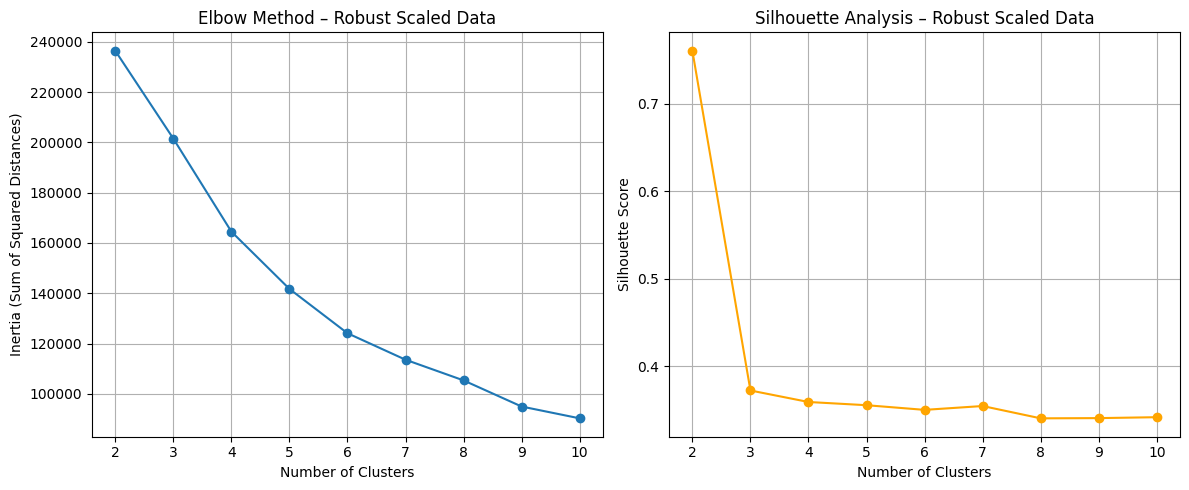

In [24]:
# Define a function to run the Elbow Method and Silhouette Analysis for a given dataset
def elbow_silhouette_analysis(scaled_data, title):
    # Range of clusters to evaluate
    range_n_clusters = range(2, 11)

    # Lists to store the results
    inertia = []  # For Elbow Method
    silhouette_scores = []  # For Silhouette Analysis

    # Loop over the range of cluster numbers
    for n_clusters in range_n_clusters:
        # Initialize KMeans model
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
        kmeans.fit(scaled_data)

        # Elbow method: store inertia
        inertia.append(kmeans.inertia_)

        # Silhouette analysis: calculate silhouette score
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(scaled_data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plot Elbow Method
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range_n_clusters, inertia, marker='o')
    plt.title(f"Elbow Method – {title}")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia (Sum of Squared Distances)")
    plt.grid(True)

    # Plot Silhouette Analysis
    plt.subplot(1, 2, 2)
    plt.plot(range_n_clusters, silhouette_scores, marker='o', color='orange')
    plt.title(f"Silhouette Analysis – {title}")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.grid(True)

    # Adjust Layout and display plots
    plt.tight_layout()
    plt.show()

# Run the analysis for each scaled dataset
elbow_silhouette_analysis(minmax_df, "MinMax Scaled Data")
elbow_silhouette_analysis(standard_df, "Standard Scaled Data")
elbow_silhouette_analysis(robust_df, "Robust Scaled Data")

As mentioned previously, all the winsorized data was put into 3 different scalers (Standard, MinMax, and Robust) before being put into an optimization code with whichever scaled data frame having the highest silhouette score being automatically modelled in the subsequent code. However, the K-Means model was the only instance where this did not occur. This was because the most optimal number of clusters indicated by the elbow method did not correspond to the highest silhouette score the model could produce. With that in mind, since the Robust scaled data had the highest silhouette score, it will be modelled using the Elbow Method's ideal number of clusters and the number of clusters that would maximize its silhouette score.

### Models
- note that only the robust data was used to visualize as it the highest silhouette score.
- The robust data was visualized using the number of clusters where the elbow bends the sharpest (5) and where the silhouette score is highest (2)

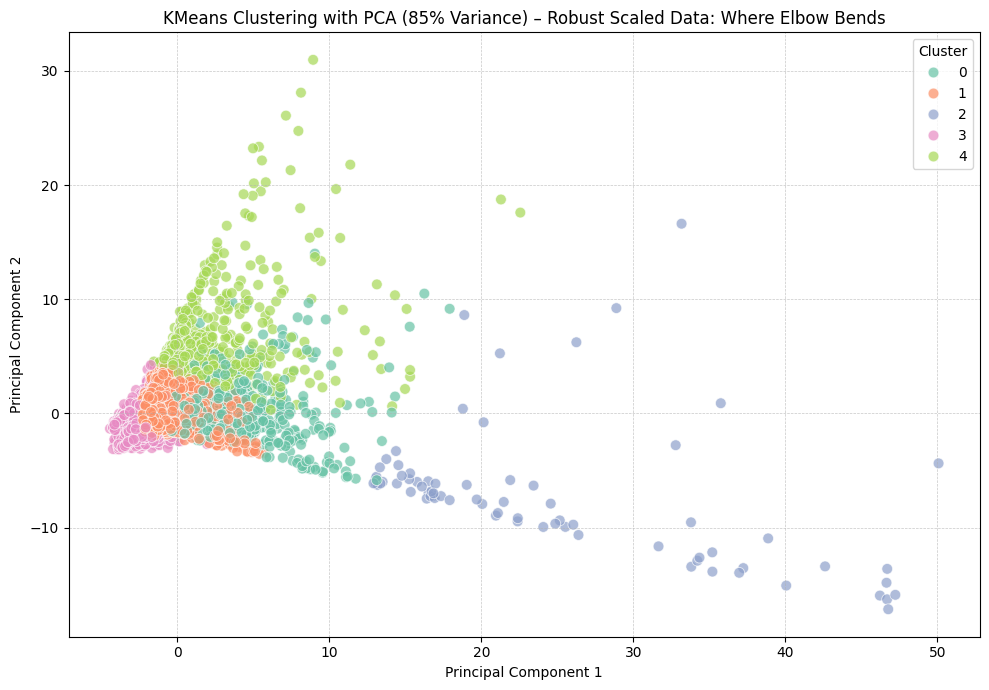

Silhouette Score: 0.42


In [25]:
def kmeans_with_pca_visualization_robust(robust_df, n_clusters):
    # Apply PCA to retain 85% variance
    pca = PCA(n_components=0.85, svd_solver='full')
    robust_pca_data = pca.fit_transform(robust_df)
    
    # Initialize and fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    robust_labels = kmeans.fit_predict(robust_pca_data)
    
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(robust_pca_data, robust_labels)
    
    # Create a DataFrame for visualization using the first two principal components
    robust_df_with_clusters = pd.DataFrame(robust_pca_data[:, :2], columns=["PC1", "PC2"])
    robust_df_with_clusters['Cluster'] = robust_labels
    
    # Plot the clusters
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=robust_df_with_clusters, palette="Set2", s=60, alpha=0.7)
    plt.title("KMeans Clustering with PCA (85% Variance) – Robust Scaled Data: Where Elbow Bends")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title='Cluster', loc='upper right')
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Print the silhouette score as a separate output
    print(f"Silhouette Score: {silhouette_avg:.2f}")

kmeans_with_pca_visualization_robust(robust_df, n_clusters=5) 

While this is where the elbow bends, highlighting the most ideal number of clusters for K-Means, it is evident why the silhouette score is so low. The clusters suffer from severe overlapping and not being clearly defined. Cluster 2 in particular also suffers from lack of compactness as its way too spread out. With this in mind, the K-Means model is not a strong candidate to be selected for usage in providing actionable insights. This unsurprising since the K-Means model is known to suffer from datasets with different sizes and densities in addition to struggling with outliers. While there was feature engineering and pre-processing done to the dataset in order to address these concerns through scaling and winsorization, it is evident that the model still has limitations in forming good clusters with the dataset.

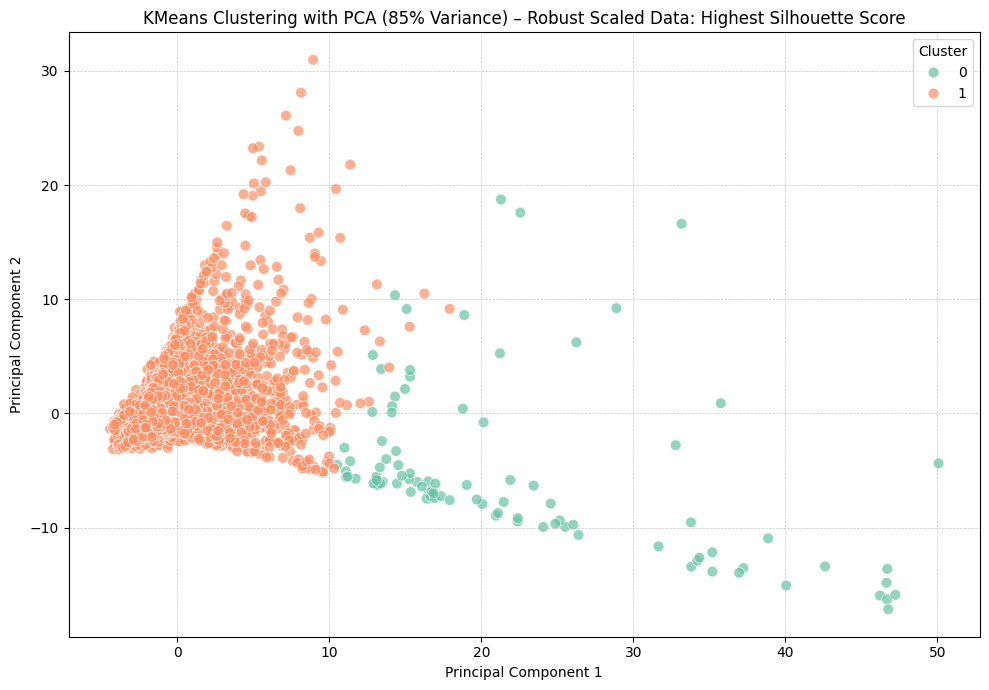

Silhouette Score: 0.78


In [26]:
def kmeans_with_pca_visualization_robust(robust_df, n_clusters):
    # Apply PCA to retain 85% variance
    pca = PCA(n_components=0.85, svd_solver='full')
    robust_pca_data = pca.fit_transform(robust_df)
    
    # Initialize and fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    robust_labels = kmeans.fit_predict(robust_pca_data)
    
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(robust_pca_data, robust_labels)
    
    # Create a DataFrame for visualization using the first two principal components
    robust_df_with_clusters = pd.DataFrame(robust_pca_data[:, :2], columns=["PC1", "PC2"])
    robust_df_with_clusters['Cluster'] = robust_labels
    
    # Plot the clusters
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=robust_df_with_clusters, palette="Set2", s=60, alpha=0.7)
    plt.title("KMeans Clustering with PCA (85% Variance) – Robust Scaled Data: Highest Silhouette Score")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title='Cluster', loc='upper right')
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Print the silhouette score as a separate output
    print(f"Silhouette Score: {silhouette_avg:.2f}")

kmeans_with_pca_visualization_robust(robust_df, n_clusters=2) 

The K-Means model using only 2 clusters to maximize the silhouette score performed very differently than the prior one using the elbow method's preferred 5. As seen, there is no minimum overlap between the two clusters but Cluster 1 in this model shares the same weaknesses discussed in the prior model's Cluster 2. It is far too close to the other cluster and is not compact enough to create a strong distinct cluster. This may be in large part to the K-Means difficulty in handling this dataset due to its abundance of outliers. However, with that being said, its silhouette score of 0.78 far exceeded expectations.

This is a mid-range candidate as despite the higher silhouette score, which indicates the clusters are compact and well separated, this score is likely to be more influenced by one of the clusters as Cluster 1 struggles with finding separation from Cluster 0.

---

## DBSCAN 
### Optimization

In [27]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def optimize_dbscan_all(minmax_df, standard_df, robust_df):
    # Define ranges for eps and min_samples
    dbscan_eps_values = np.arange(0.5, 3.0, 0.5)
    dbscan_min_samples_values = range(3, 10)
    
    # Dictionary to hold the datasets and titles
    dbscan_datasets = {
        "MinMax Data": minmax_df,
        "Standard Data": standard_df,
        "Robust Data": robust_df
    }
    
    # Variables to track the best overall configuration
    best_dbscan_title = None
    best_dbscan_eps = None
    best_dbscan_min_samples = None
    best_dbscan_score = -1
    best_dbscan_data = None  # Renamed variable
    
    # Iterate over each dataset
    for dbscan_title, dbscan_scaled_data in dbscan_datasets.items():
        # Local variables to find the best for each dataset
        best_dbscan_eps_for_dataset = None
        best_dbscan_min_samples_for_dataset = None
        best_dbscan_score_for_dataset = -1
        
        # Iterate over combinations of eps and min_samples
        for dbscan_eps in dbscan_eps_values:
            early_break = False  # Flag for early termination of inner loop
            
            for dbscan_min_samples in dbscan_min_samples_values:
                dbscan_model = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)
                dbscan_labels = dbscan_model.fit_predict(dbscan_scaled_data)
                
                # Count the number of clusters (excluding noise)
                dbscan_n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
                
                # Skip configurations with fewer than two clusters
                if dbscan_n_clusters < 2:
                    early_break = True
                    break  # Skip further min_samples for this eps value
                
                # Calculate silhouette score for valid configurations
                dbscan_score = silhouette_score(dbscan_scaled_data, dbscan_labels)
                
                # Update the best score for the current dataset
                if dbscan_score > best_dbscan_score_for_dataset:
                    best_dbscan_eps_for_dataset = dbscan_eps
                    best_dbscan_min_samples_for_dataset = dbscan_min_samples
                    best_dbscan_score_for_dataset = dbscan_score
            
            if early_break:
                break  # Exit the loop for the current `eps` as increasing `min_samples` further will likely reduce clusters

        # Print the best configuration for this dataset
        print(f"{dbscan_title} - Best eps: {best_dbscan_eps_for_dataset}, Best min_samples: {best_dbscan_min_samples_for_dataset}, "
              f"Silhouette Score: {best_dbscan_score_for_dataset}")
        
        # Update the best overall if this dataset's result is better
        if best_dbscan_score_for_dataset > best_dbscan_score:
            best_dbscan_title = dbscan_title
            best_dbscan_eps = best_dbscan_eps_for_dataset
            best_dbscan_min_samples = best_dbscan_min_samples_for_dataset
            best_dbscan_score = best_dbscan_score_for_dataset
            best_dbscan_data = dbscan_scaled_data  # Updated to best_dbscan_data

    # Return the best configuration across all datasets
    return best_dbscan_data, best_dbscan_eps, best_dbscan_min_samples, best_dbscan_score, best_dbscan_title

# Use the function to process all three datasets at once
best_dbscan_data, best_dbscan_eps, best_dbscan_min_samples, best_dbscan_score, best_dbscan_title = optimize_dbscan_all(minmax_df, standard_df, robust_df)

# Print the overall best configuration
print(f"\nBest configuration across all datasets:")
print(f"Dataset: {best_dbscan_title}, Eps: {best_dbscan_eps}, Min Samples: {best_dbscan_min_samples}, Silhouette Score: {best_dbscan_score}")

MinMax Data - Best eps: 0.5, Best min_samples: 3, Silhouette Score: 0.4450660122228578
Standard Data - Best eps: 1.0, Best min_samples: 6, Silhouette Score: 0.14817505286304009
Robust Data - Best eps: 1.5, Best min_samples: 6, Silhouette Score: 0.3893577677608093

Best configuration across all datasets:
Dataset: MinMax Data, Eps: 0.5, Min Samples: 3, Silhouette Score: 0.4450660122228578


To optimize this model, a range of eps and min_samples were tested as these were the relevant parameters for DBSCAN. It was surprising to see the model score so poorly as DBSCAN is known to be optimal for handling clusters of different sizes and handling outliers. However, the highest score is MinMax at just 0.43. The 12 features may have been what caused this as the model does have a tendency to struggle with high dimensional datasets.

### Model

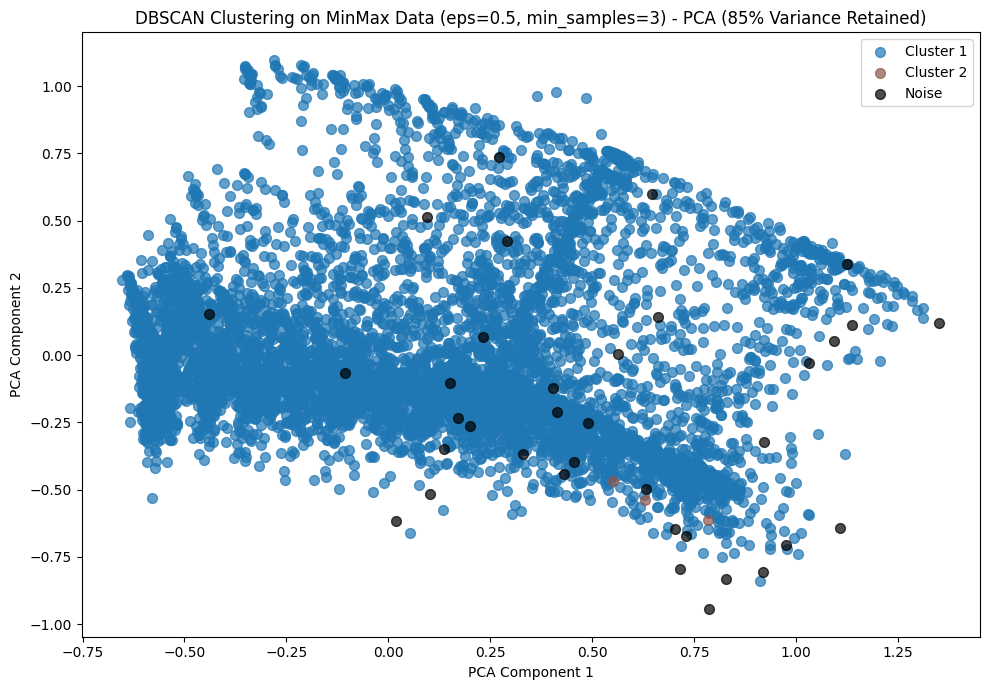

Silhouette Score: 0.4450660122228578
Number of Clusters: 2
Number of Noise Points: 36


In [28]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

def visualize_best_dbscan_clusters_optimized_pca(best_dbscan_data, best_dbscan_eps, best_dbscan_min_samples, best_dbscan_title):
    # Perform DBSCAN with the best parameters
    dbscan = DBSCAN(eps=best_dbscan_eps, min_samples=best_dbscan_min_samples)
    labels = dbscan.fit_predict(best_dbscan_data)
    
    # Calculate additional metrics
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    if n_clusters > 1:
        silhouette_avg = silhouette_score(best_dbscan_data, labels)
    else:
        silhouette_avg = "Not applicable"  # For cases with 1 or no clusters

    # Apply PCA to retain 85% of variance
    pca = PCA(n_components=0.85)
    pca_data = pca.fit_transform(best_dbscan_data)
    
    # If PCA reduces to more than 2 dimensions, select only the first two components for visualization
    if pca_data.shape[1] > 2:
        pca_data = pca_data[:, :2]
    
    # Plot the clusters
    plt.figure(figsize=(10, 7))
    unique_labels = set(labels)
    
    # Use distinct colors for clusters and set noise to black
    colors = plt.cm.get_cmap("tab20", len(unique_labels))
    for label in unique_labels:
        if label == -1:
            # Black color for noise points
            color = "black"
            label_text = "Noise"
        else:
            color = colors(label)
            label_text = f"Cluster {label + 1}"
        
        plt.scatter(
            pca_data[labels == label, 0], 
            pca_data[labels == label, 1], 
            s=50, c=[color], label=label_text, alpha=0.7
        )
    
    # Title with dataset name and best parameters
    plt.title(f"DBSCAN Clustering on {best_dbscan_title} (eps={best_dbscan_eps}, min_samples={best_dbscan_min_samples}) - PCA (85% Variance Retained)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Return the metrics as separate outputs
    return silhouette_avg, n_clusters, n_noise

# Call the function using the best configuration from optimize_dbscan_all
silhouette_avg, num_clusters, num_noise_points = visualize_best_dbscan_clusters_optimized_pca(
    best_dbscan_data, best_dbscan_eps, best_dbscan_min_samples, best_dbscan_title
)

# Display the metrics separately
print(f"Silhouette Score: {silhouette_avg}")
print(f"Number of Clusters: {num_clusters}")
print(f"Number of Noise Points: {num_noise_points}")

As seen from this visualization, the clusters formed here are not ideal whatsoever. While the model states that there are 2 clusters, it is evident that one of the clusters (Cluster 1) is heavily overlapping the other. Additonally, the clusters formed are way too spread out across the scatterplot, making it difficult to do customer segmentation for the purposes of proposing actionable insights for the credit card company. Considering this, the DBSCAN model will not be selected.

---

## HDBSCAN 
### Optimization

In [29]:
import numpy as np
from sklearn.metrics import silhouette_score
import hdbscan

def optimize_hdbscan_all(minmax_df, standard_df, robust_df):
    # Define ranges for min_cluster_size and min_samples
    hdbscan_min_cluster_sizes = range(5, 15)
    hdbscan_min_samples_values = range(1, 7)
    
    # Dictionary to hold the datasets and titles
    hdbscan_datasets = {
        "MinMax Data": minmax_df,
        "Standard Data": standard_df,
        "Robust Data": robust_df
    }
    
    # Variables to track the best overall configuration
    best_hdbscan_title = None
    best_hdbscan_min_cluster_size = None
    best_hdbscan_min_samples = None
    best_hdbscan_score = -1
    best_hdbscan_data = None  # Renamed variable to best_hdbscan_data
    
    # Iterate over each dataset
    for hdbscan_title, scaled_data in hdbscan_datasets.items():
        # Local variables to find the best for each dataset
        best_hdbscan_min_cluster_size_for_dataset = None
        best_hdbscan_min_samples_for_dataset = None
        best_hdbscan_score_for_dataset = -1
        
        # Iterate over combinations of min_cluster_size and min_samples
        for hdbscan_min_cluster_size in hdbscan_min_cluster_sizes:
            for hdbscan_min_samples in hdbscan_min_samples_values:
                # Create HDBSCAN clusterer
                clusterer = hdbscan.HDBSCAN(min_cluster_size=hdbscan_min_cluster_size, min_samples=hdbscan_min_samples)
                labels = clusterer.fit_predict(scaled_data)
                
                # Count the number of clusters (excluding noise)
                hdbscan_n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
                
                # Skip configurations with fewer than two clusters
                if hdbscan_n_clusters < 2:
                    continue
                
                # Calculate the silhouette score for valid configurations
                hdbscan_sil_score = silhouette_score(scaled_data, labels)  # Renamed to avoid shadowing
                
                # Update the best score for the current dataset
                if hdbscan_sil_score > best_hdbscan_score_for_dataset:
                    best_hdbscan_min_cluster_size_for_dataset = hdbscan_min_cluster_size
                    best_hdbscan_min_samples_for_dataset = hdbscan_min_samples
                    best_hdbscan_score_for_dataset = hdbscan_sil_score
                
                # If we encounter very low clusters with high min_samples, break inner loop
                if hdbscan_n_clusters <= 2:
                    break  # Skip further min_samples for this min_cluster_size as it’s unlikely to improve
        
        # Print the best configuration for this dataset
        print(f"{hdbscan_title} - Best min_cluster_size: {best_hdbscan_min_cluster_size_for_dataset}, "
              f"Best min_samples: {best_hdbscan_min_samples_for_dataset}, Silhouette Score: {best_hdbscan_score_for_dataset}")
        
        # Update the best overall if this dataset's result is better
        if best_hdbscan_score_for_dataset > best_hdbscan_score:
            best_hdbscan_title = hdbscan_title
            best_hdbscan_min_cluster_size = best_hdbscan_min_cluster_size_for_dataset
            best_hdbscan_min_samples = best_hdbscan_min_samples_for_dataset
            best_hdbscan_score = best_hdbscan_score_for_dataset
            best_hdbscan_data = scaled_data  # Updated to best_hdbscan_data

    # Return the best configuration across all datasets
    return best_hdbscan_data, best_hdbscan_min_cluster_size, best_hdbscan_min_samples, best_hdbscan_score, best_hdbscan_title

# Use the function to process all three datasets at once
best_hdbscan_data, best_hdbscan_min_cluster_size, best_hdbscan_min_samples, best_hdbscan_score, best_hdbscan_title = optimize_hdbscan_all(minmax_df, standard_df, robust_df)

# Print the overall best configuration
print(f"\nBest configuration across all datasets:")
print(f"Dataset: {best_hdbscan_title}, Min Cluster Size: {best_hdbscan_min_cluster_size}, Min Samples: {best_hdbscan_min_samples}, Silhouette Score: {best_hdbscan_score}")

MinMax Data - Best min_cluster_size: 5, Best min_samples: 1, Silhouette Score: -0.3020980609432796
Standard Data - Best min_cluster_size: 8, Best min_samples: 3, Silhouette Score: 0.6039483860586253
Robust Data - Best min_cluster_size: 13, Best min_samples: 1, Silhouette Score: 0.7631367261015144

Best configuration across all datasets:
Dataset: Robust Data, Min Cluster Size: 13, Min Samples: 1, Silhouette Score: 0.7631367261015144


This model was selected because it shares the same characteristics as DBSCAN. However, the difference is that unlike using eps, the HDBSCAN uses minimum cluster sizing. While the two models share similar characteristics in being able to better handle outliers and varying cluster sizes, this model performed remarkably better. Unlike the DBSCAN, the relatively high-dimensionality of the data did not limit the HDBSCAN in performing admirably well with a 0.76 score with the robust scaler. 

### Model

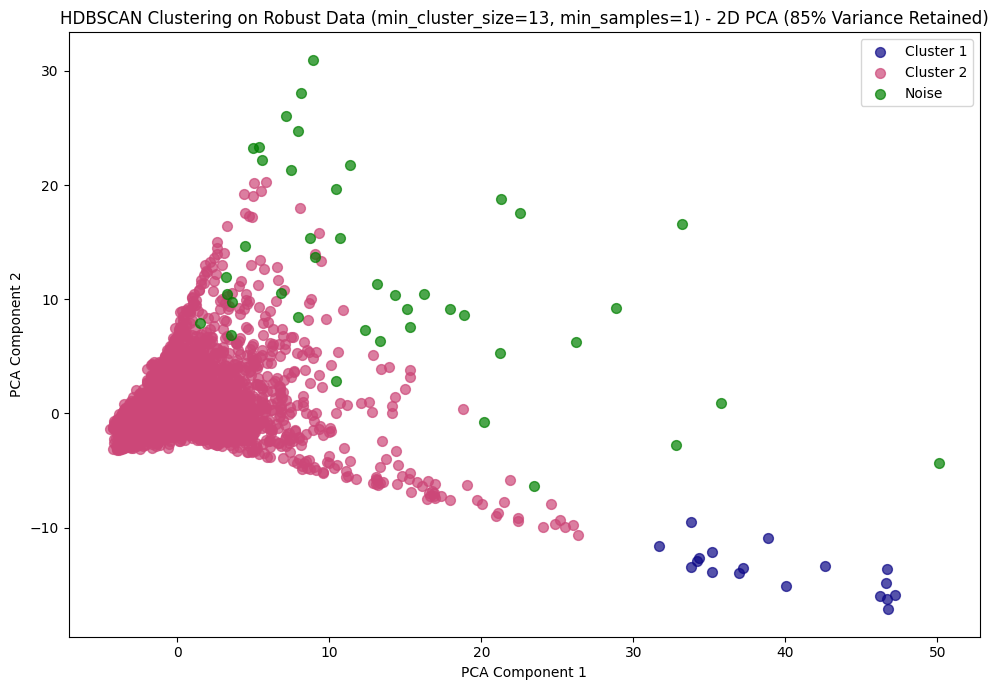

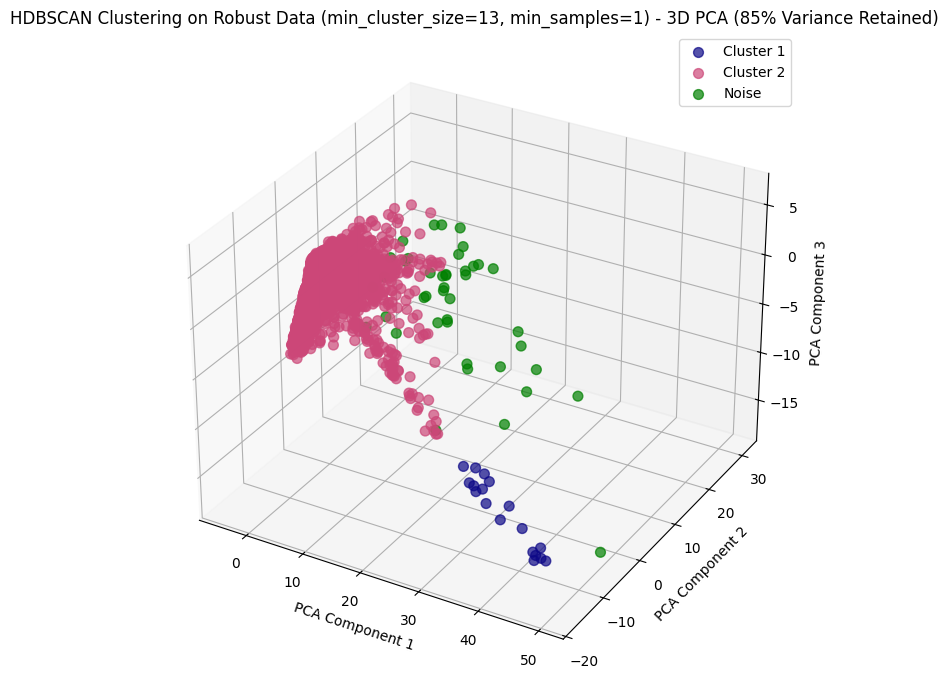

Silhouette Score: 0.7631367261015144
Number of Clusters: 2
Number of Noise Points: 42


In [30]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import hdbscan

# Function to visualize the best HDBSCAN clusters with optimized PCA
def visualize_best_hdbscan_clusters_optimized_pca(best_hdbscan_data, best_hdbscan_min_cluster_size, best_hdbscan_min_samples, best_hdbscan_title):
    # Perform HDBSCAN with the best parameters
    clusterer = hdbscan.HDBSCAN(min_cluster_size=best_hdbscan_min_cluster_size, min_samples=best_hdbscan_min_samples)
    labels = clusterer.fit_predict(best_hdbscan_data)
    
    # Calculate additional metrics
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    if n_clusters > 1:
        silhouette_avg = silhouette_score(best_hdbscan_data, labels)
    else:
        silhouette_avg = "Not applicable"  # For cases with 1 or no clusters

    # Apply PCA to retain 85% of variance
    pca = PCA(n_components=0.85)
    pca_data = pca.fit_transform(best_hdbscan_data)
    
    # Determine if 2D or 3D visualization is possible
    if pca_data.shape[1] >= 3:
        # Use 3 components for 3D visualization if possible
        pca_3d_data = pca_data[:, :3]
        pca_2d_data = pca_data[:, :2]
    else:
        # If only 2 components, use for both visualizations
        pca_2d_data = pca_data
        pca_3d_data = None  # Not enough dimensions for 3D
    
    # 2D Plot
    plt.figure(figsize=(10, 7))
    unique_labels = set(labels)
    
    # Use the 'plasma' colormap, which does not have brown
    colors = plt.cm.get_cmap("plasma", len(unique_labels))
    for label in unique_labels:
        if label == -1:
            color = "green"
            label_text = "Noise"
        else:
            color = colors(label)
            label_text = f"Cluster {label + 1}"
        
        plt.scatter(
            pca_2d_data[labels == label, 0], 
            pca_2d_data[labels == label, 1], 
            s=50, c=[color], label=label_text, alpha=0.7
        )
    
    plt.title(f"HDBSCAN Clustering on {best_hdbscan_title} (min_cluster_size={best_hdbscan_min_cluster_size}, "
              f"min_samples={best_hdbscan_min_samples}) - 2D PCA (85% Variance Retained)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 3D Plot (if available)
    if pca_3d_data is not None:
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        for label in unique_labels:
            if label == -1:
                color = "green"
                label_text = "Noise"
            else:
                color = colors(label)
                label_text = f"Cluster {label + 1}"
            
            ax.scatter(
                pca_3d_data[labels == label, 0],
                pca_3d_data[labels == label, 1],
                pca_3d_data[labels == label, 2],
                s=50, c=[color], label=label_text, alpha=0.7
            )
        
        ax.set_title(f"HDBSCAN Clustering on {best_hdbscan_title} (min_cluster_size={best_hdbscan_min_cluster_size}, "
                     f"min_samples={best_hdbscan_min_samples}) - 3D PCA (85% Variance Retained)")
        ax.set_xlabel("PCA Component 1")
        ax.set_ylabel("PCA Component 2")
        ax.set_zlabel("PCA Component 3")
        ax.legend()
        plt.tight_layout()
        plt.show()

    # Return the metrics as separate outputs, including the labels
    return silhouette_avg, n_clusters, n_noise, labels

# Function to characterize clusters based on the clustering labels
def characterize_clusters(data, labels):
    # Convert to DataFrame if necessary
    if isinstance(data, np.ndarray):
        data = pd.DataFrame(data, columns=[f"Feature_{i+1}" for i in range(data.shape[1])])
    
    # Add the labels as a new column
    data['Cluster'] = labels
    
    # Group by cluster and calculate mean for each feature
    cluster_characteristics = data.groupby('Cluster').mean()
    
    # Count the number of points in each cluster
    cluster_sizes = data['Cluster'].value_counts().sort_index()
    
    # Add the size of each cluster as a new column
    cluster_characteristics['Cluster Size'] = cluster_sizes

    # Reset index for better readability
    cluster_characteristics.reset_index(inplace=True)

# Call the function using the best configuration from optimize_hdbscan_all
silhouette_avg, num_clusters, num_noise_points, labels = visualize_best_hdbscan_clusters_optimized_pca(
    best_hdbscan_data, best_hdbscan_min_cluster_size, best_hdbscan_min_samples, best_hdbscan_title
)

# Display the metrics separately
print(f"Silhouette Score: {silhouette_avg}")
print(f"Number of Clusters: {num_clusters}")
print(f"Number of Noise Points: {num_noise_points}")

This model is the first out of the ones tested up to this point to create multiple distinct clusters. While one is clearly larger than the other, there is enough spacing between the two to clearly differentiate between each other. With that in mind, this would be an optimal model to select to assist in crafting actionable insights as there are few clusters so that quality, distinct recommendations can be put forth. The limited number of clusters means that each cluster in theory should be large enough to reflect a significant portion of the customer's behaviour in relation to this dataset. While the one shortcoming of this model is that the second cluster is much smaller, it is still distinct from the other cluster without any overlap. At this point in time, it has been the best model.

---

## Mean Shift
### Optimization

In [31]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score

def optimize_mean_shift_all(minmax_df, standard_df, robust_df):
    # Define range for bandwidths
    meanshift_bandwidth_values = np.arange(1, 2.75, 1)
    
    # Dictionary to hold the datasets and titles
    meanshift_datasets = {
        "MinMax Data": minmax_df,
        "Standard Data": standard_df,
        "Robust Data": robust_df
    }
    
    # Variables to track the best overall configuration
    best_meanshift_title = None
    best_meanshift_bandwidth = None
    best_meanshift_score = -1
    best_meanshift_data = None  # Renamed variable to best_meanshift_data
    
    # Iterate over each dataset
    for meanshift_title, scaled_data in meanshift_datasets.items():
        # Local variables to find the best for each dataset
        best_meanshift_bandwidth_for_dataset = None
        best_meanshift_score_for_dataset = -1
        
        # Iterate over bandwidth values
        for meanshift_bandwidth in meanshift_bandwidth_values:
            ms = MeanShift(bandwidth=meanshift_bandwidth)
            labels = ms.fit_predict(scaled_data)
            
            # Count the number of clusters (excluding noise)
            meanshift_n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            
            # Skip configurations with fewer than two clusters
            if meanshift_n_clusters < 2:
                break  # If a larger bandwidth produces few clusters, break early to save time
            
            # Calculate silhouette score for valid configurations
            meanshift_score = silhouette_score(scaled_data, labels)
            
            # Update the best score for the current dataset
            if meanshift_score > best_meanshift_score_for_dataset:
                best_meanshift_bandwidth_for_dataset = meanshift_bandwidth
                best_meanshift_score_for_dataset = meanshift_score
        
        # Print the best configuration for this dataset
        print(f"{meanshift_title} - Best bandwidth: {best_meanshift_bandwidth_for_dataset}, Silhouette Score: {best_meanshift_score_for_dataset}")
        
        # Update the best overall if this dataset's result is better
        if best_meanshift_score_for_dataset > best_meanshift_score:
            best_meanshift_title = meanshift_title
            best_meanshift_bandwidth = best_meanshift_bandwidth_for_dataset
            best_meanshift_score = best_meanshift_score_for_dataset
            best_meanshift_data = scaled_data  # Updated to best_meanshift_data

    # Return the best configuration across all datasets
    return best_meanshift_data, best_meanshift_bandwidth, best_meanshift_score, best_meanshift_title

# Use the function to process all three datasets at once
best_meanshift_data, best_meanshift_bandwidth, best_meanshift_score, best_meanshift_title = optimize_mean_shift_all(minmax_df, standard_df, robust_df)

# Print the overall best configuration
print(f"\nBest configuration across all datasets:")
print(f"Dataset: {best_meanshift_title}, Bandwidth: {best_meanshift_bandwidth}, Silhouette Score: {best_meanshift_score}")

MinMax Data - Best bandwidth: 1.0, Silhouette Score: 0.4813111021294197
Standard Data - Best bandwidth: 2.0, Silhouette Score: 0.09474136508893234
Robust Data - Best bandwidth: 2.0, Silhouette Score: 0.12045503536001766

Best configuration across all datasets:
Dataset: MinMax Data, Bandwidth: 1.0, Silhouette Score: 0.4813111021294197


This model's parameters that needed to be optimized concerned the best bandwidth. As seen with performance, the MinMax performed the best by far with a silhouette score of 0.47. However, this being the model's best score reflects that Mean Shift is unlikely to be selected. While this model is also known for being able to handle outliers relatively well, the data's 12 features even after feature enginnering may still be too high dimensional for Mean Shift to handle.

### Model

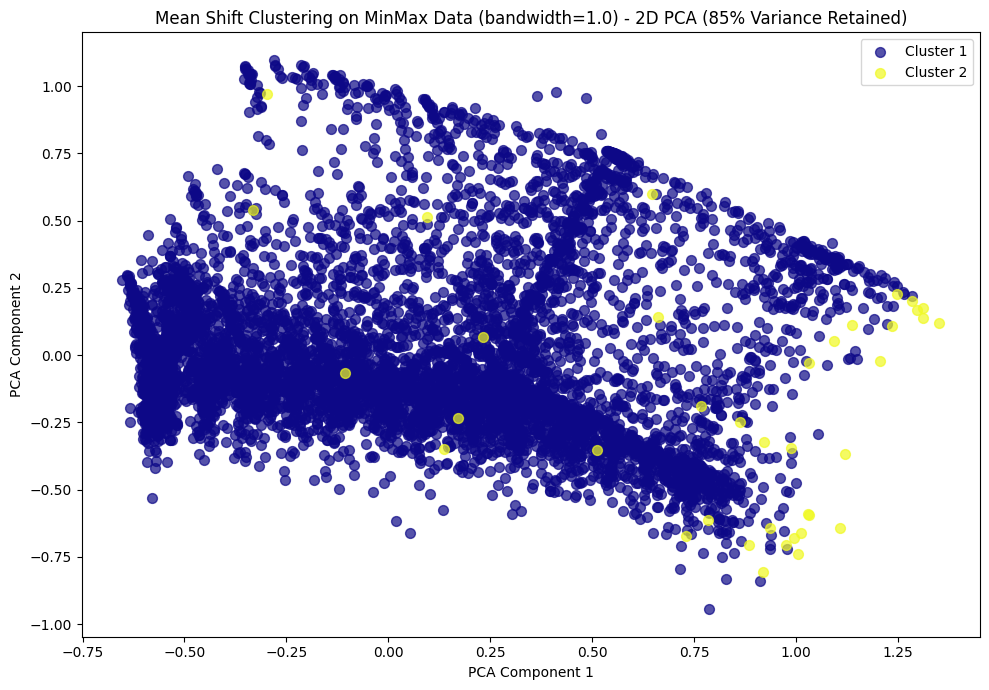

Silhouette Score: 0.4813111021294197
Number of Clusters: 2
Number of Noise Points: 0


In [32]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift

def visualize_best_mean_shift_clusters_optimized_pca(best_meanshift_data, best_meanshift_bandwidth, best_meanshift_title):
    # Perform Mean Shift with the best bandwidth
    ms = MeanShift(bandwidth=best_meanshift_bandwidth)
    labels = ms.fit_predict(best_meanshift_data)
    
    # Calculate additional metrics
    n_meanshift_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_meanshift_noise = list(labels).count(-1)
    if n_meanshift_clusters > 1:
        silhouette_meanshift_avg = silhouette_score(best_meanshift_data, labels)
    else:
        silhouette_meanshift_avg = "Not applicable"  # For cases with 1 or no clusters

    # Apply PCA to retain 85% of variance
    pca = PCA(n_components=0.85)
    pca_data = pca.fit_transform(best_meanshift_data)
    
    # If PCA reduces to more than 2 dimensions, select only the first two components for visualization
    if pca_data.shape[1] > 2:
        pca_data = pca_data[:, :2]
    
    # Plot the clusters
    plt.figure(figsize=(10, 7))
    unique_labels = set(labels)
    
    # Use a color map without brown tones
    colors = plt.cm.get_cmap("plasma", len(unique_labels))
    for label in unique_labels:
        if label == -1:
            color = "black"
            label_text = "Noise"
        else:
            color = colors(label)
            label_text = f"Cluster {label + 1}"
        
        plt.scatter(
            pca_data[labels == label, 0], 
            pca_data[labels == label, 1], 
            s=50, c=[color], label=label_text, alpha=0.7
        )
    
    plt.title(f"Mean Shift Clustering on {best_meanshift_title} (bandwidth={best_meanshift_bandwidth}) - 2D PCA (85% Variance Retained)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Return the metrics as separate outputs
    return silhouette_meanshift_avg, n_meanshift_clusters, n_meanshift_noise

# Call the function using the best configuration from optimize_mean_shift_all
silhouette_meanshift_avg, num_meanshift_clusters, num_meanshift_noise_points = visualize_best_mean_shift_clusters_optimized_pca(
    best_meanshift_data, best_meanshift_bandwidth, best_meanshift_title
)

# Display the metrics separately
print(f"Silhouette Score: {silhouette_meanshift_avg}")
print(f"Number of Clusters: {num_meanshift_clusters}")
print(f"Number of Noise Points: {num_meanshift_noise_points}")

This model performed very poorly in that the number of clusters being 2 is very misleading. As shown above, there is almost total overlap between both clusters. Additionally, the second cluster is almost non existent compared to the first one as the first is spread throughout the visual and the part of Cluster 2 that is not overlapping is such a small amount it can almost be considered as noise points than a cluster itself. With this in mind, this model would not be apprpriate for selection.

---

## Expectation Maximization
### Optimization

In [33]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np

def optimize_em_all(minmax_df, standard_df, robust_df):
    # Define ranges for number of components and covariance types
    n_components_values = range(2, 5) 
    covariance_types = ['full', 'tied', 'diag', 'spherical']
    
    # Dictionary to hold the datasets and titles
    datasets = {
        "MinMax Data": minmax_df,
        "Standard Data": standard_df,
        "Robust Data": robust_df
    }
    
    # Variables to track the best overall configuration
    best_em_title = None
    best_em_n_components = None
    best_em_covariance_type = None
    best_em_score = -1
    best_em_data = None  # Renamed variable to best_em_data
    
    # Iterate over each dataset
    for title, scaled_data in datasets.items():
        # Local variables to find the best for each dataset
        best_em_n_components_for_dataset = None
        best_em_covariance_type_for_dataset = None
        best_em_score_for_dataset = -1
        
        # Iterate over combinations of n_components and covariance_type
        for n_components in n_components_values:
            early_termination = False  # Flag for early termination
            
            for covariance_type in covariance_types:
                gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=42)
                
                # Fit the model and get labels
                labels = gmm.fit_predict(scaled_data)
                
                # Count the number of unique clusters
                n_clusters = len(set(labels))
                
                # Skip configurations with fewer than two clusters
                if n_clusters < 2:
                    early_termination = True
                    break  # Skip further covariance types for this n_components
                
                # Calculate silhouette score for valid configurations
                score = silhouette_score(scaled_data, labels)
                
                # Update the best score for the current dataset
                if score > best_em_score_for_dataset:
                    best_em_n_components_for_dataset = n_components
                    best_em_covariance_type_for_dataset = covariance_type
                    best_em_score_for_dataset = score
            
            if early_termination:
                break  # Exit the loop for current `n_components` as increasing it will likely reduce the cluster count
        
        # Print the best configuration for this dataset
        print(f"{title} - Best n_components: {best_em_n_components_for_dataset}, "
              f"Covariance Type: {best_em_covariance_type_for_dataset}, Silhouette Score: {best_em_score_for_dataset}")
        
        # Update the best overall if this dataset's result is better
        if best_em_score_for_dataset > best_em_score:
            best_em_title = title
            best_em_n_components = best_em_n_components_for_dataset
            best_em_covariance_type = best_em_covariance_type_for_dataset
            best_em_score = best_em_score_for_dataset
            best_em_data = scaled_data  # Updated to best_em_data

    # Return the best configuration across all datasets
    return best_em_data, best_em_n_components, best_em_covariance_type, best_em_score, best_em_title

# Use the function to process all three datasets at once
best_em_data, best_em_n_components, best_em_covariance_type, best_em_score, best_em_title = optimize_em_all(minmax_df, standard_df, robust_df)

# Print the overall best configuration
print(f"\nBest configuration across all datasets:")
print(f"Dataset: {best_em_title}, N Components: {best_em_n_components}, Covariance Type: {best_em_covariance_type}, Silhouette Score: {best_em_score}")

MinMax Data - Best n_components: 2, Covariance Type: tied, Silhouette Score: 0.3363746196733411
Standard Data - Best n_components: 2, Covariance Type: tied, Silhouette Score: 0.39006301211571365
Robust Data - Best n_components: 2, Covariance Type: tied, Silhouette Score: 0.7756936554766956

Best configuration across all datasets:
Dataset: Robust Data, N Components: 2, Covariance Type: tied, Silhouette Score: 0.7756936554766956


Expectation Maximization is used in this Gaussian Mixture Model as it was applied to different configurations across three PCA-transformed datasets (MinMax data, Standard data and Robust data). This model was optimized using two main parameters: n_components (numbers of clusters) and covariance_type (which could be "full", "tied", "diag", or "spherical"). Diiferent values or n_components and covariance_type was tested to find the best configuration for each dataset based on the silhouette score. 
Across all datasets, 2 clusters (components) was seen as the most optimal. This means that the dataset is best represented by two primary clusters which could indicate that there are two dominant groups or patterns in the data. All the covariance types are "tied" which indicates a level of uniformity in the cluster shapes. Finally, the Robust Data outperformed the other datasets in terms of silhouette score (0.7757), indicating that it provides the most well-separated clusters in this configuration.

### Model

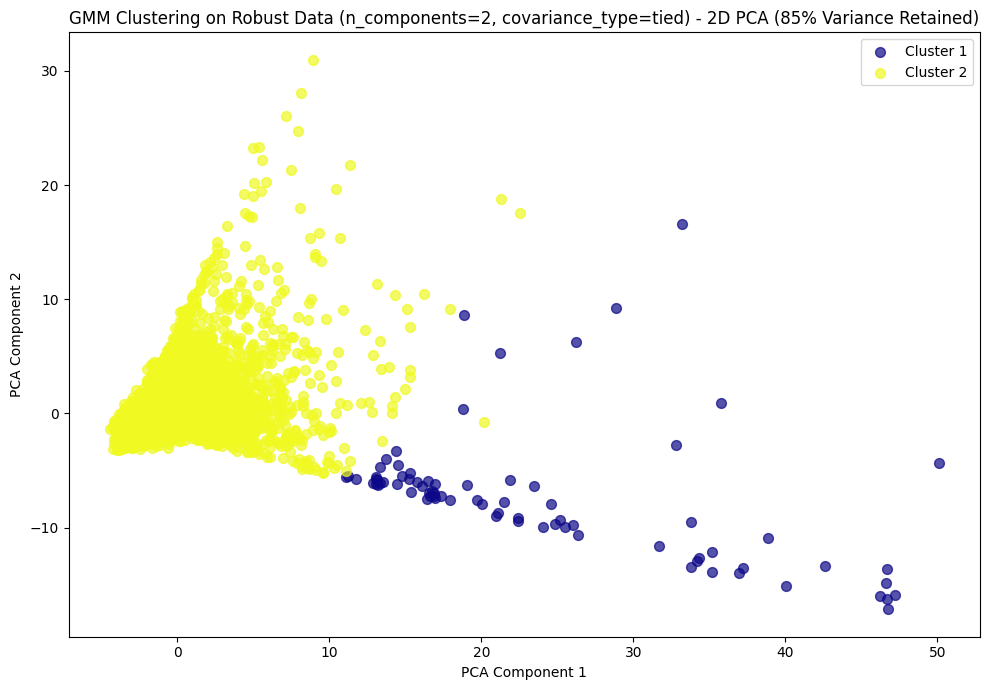

Silhouette Score: 0.7756936554766956
Number of Clusters: 2
Number of Noise Points: 0


In [34]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def visualize_best_em_clusters_optimized_pca(best_em_data, best_em_n_components, best_em_covariance_type, best_em_title):
    # Perform GMM with the best parameters
    gmm = GaussianMixture(n_components=best_em_n_components, covariance_type=best_em_covariance_type, random_state=42)
    labels = gmm.fit_predict(best_em_data)
    
    # Calculate additional metrics
    n_em_clusters = len(set(labels))
    n_em_noise = list(labels).count(-1)  # For GMM, there usually isn’t noise, but including this for consistency
    if n_em_clusters > 1:
        silhouette_em_avg = silhouette_score(best_em_data, labels)
    else:
        silhouette_em_avg = "Not applicable"  # For cases with 1 or no clusters

    # Apply PCA to retain 85% of variance
    pca = PCA(n_components=0.85)
    pca_data = pca.fit_transform(best_em_data)
    
    # If PCA reduces to more than 2 dimensions, select only the first two components for visualization
    if pca_data.shape[1] > 2:
        pca_data = pca_data[:, :2]
    
    # Plot the clusters
    plt.figure(figsize=(10, 7))
    unique_labels = set(labels)
    
    # Use a color map without brown tones
    colors = plt.cm.get_cmap("plasma", len(unique_labels))
    for label in unique_labels:
        if label == -1:
            color = "black"
            label_text = "Noise"
        else:
            color = colors(label)
            label_text = f"Cluster {label + 1}"
        
        plt.scatter(
            pca_data[labels == label, 0], 
            pca_data[labels == label, 1], 
            s=50, c=[color], label=label_text, alpha=0.7
        )
    
    plt.title(f"GMM Clustering on {best_em_title} (n_components={best_em_n_components}, covariance_type={best_em_covariance_type}) - 2D PCA (85% Variance Retained)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Return the metrics as separate outputs
    return silhouette_em_avg, n_em_clusters, n_em_noise

# Call the function using the best configuration from optimize_em_all
silhouette_em_avg, num_em_clusters, num_em_noise_points = visualize_best_em_clusters_optimized_pca(
    best_em_data, best_em_n_components, best_em_covariance_type, best_em_title
)

# Display the metrics separately
print(f"Silhouette Score: {silhouette_em_avg}")
print(f"Number of Clusters: {num_em_clusters}")
print(f"Number of Noise Points: {num_em_noise_points}")

Robust Data produced the highest silhouette score meaning that the transformation applied is suited well for Gaussian-based clustering. Robust PCA minimized the impact of outliers, which allowed the EM model to converge a clearer clustering solution. However, cluster compactness is an issue as some clusters appear more spread out than others making it diffcult to draw clear distinctions between customers segments. Due to the overlapping and lack of compactness and spacing between the clusters, there are clear limitations with this model despite the higher silhouette score.

---

## Agglomerative Clustering 
### Optimization

MinMax Data - Best n_clusters: 2, Linkage: single, Silhouette Score: 0.47341106406099853
Standard Data - Best n_clusters: 2, Linkage: single, Silhouette Score: 0.7527725833138681
Robust Data - Best n_clusters: 2, Linkage: complete, Silhouette Score: 0.8565167793876272

Visualizing the dendrogram for the best dataset: Robust Data


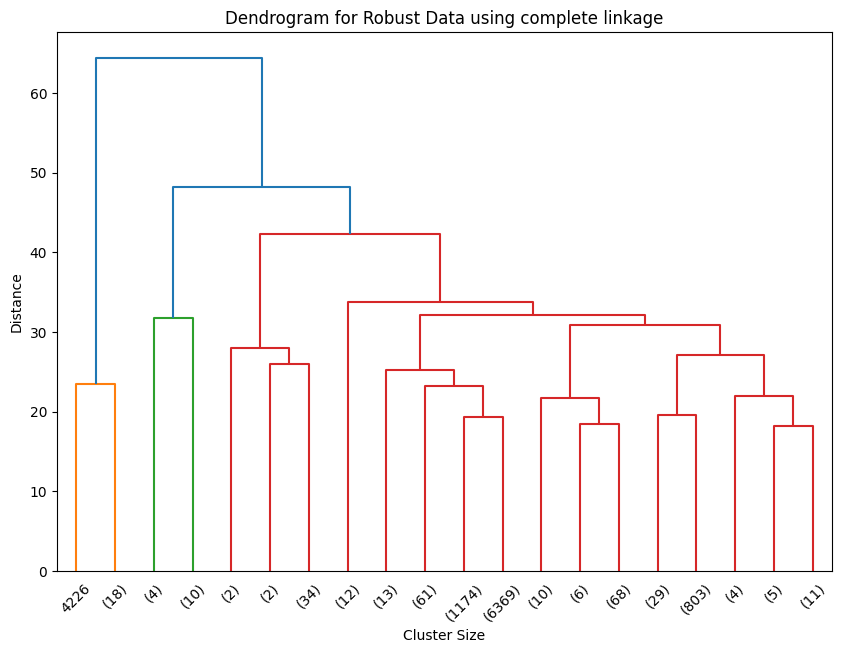


Best configuration across all datasets:
Dataset: Robust Data, N Clusters: 2, Linkage: complete, Silhouette Score: 0.8565167793876272


In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def plot_dendrogram(data, method, title):
    # Generate the linkage matrix
    linked = linkage(data, method=method)
    
    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=45, leaf_font_size=10)
    plt.title(f"Dendrogram for {title} using {method} linkage")
    plt.xlabel("Cluster Size")
    plt.ylabel("Distance")
    plt.show()

def optimize_agglomerative_all(minmax_df, standard_df, robust_df):
    # Define ranges for number of clusters and linkage types
    n_clusters_values = range(2, 10)  # Adjust range as needed
    linkage_methods = ['ward', 'complete', 'average', 'single']
    
    # Dictionary to hold the datasets and titles
    datasets = {
        "MinMax Data": minmax_df,
        "Standard Data": standard_df,
        "Robust Data": robust_df
    }
    
    # Variables to track the best overall configuration
    best_agglomerative_title = None
    best_agglomerative_n_clusters = None
    best_agglomerative_linkage = None
    best_agglomerative_score = -1
    best_agglomerative_data = None  # Renamed variable to best_agglomerative_data
    
    # Iterate over each dataset
    for title, scaled_data in datasets.items():
        # Local variables to find the best for each dataset
        best_n_clusters_for_dataset = None
        best_linkage_for_dataset = None
        best_score_for_dataset = -1
        
        # Iterate over combinations of n_clusters and linkage
        for n_clusters in n_clusters_values:
            for linkage_method in linkage_methods:
                # Ward linkage requires Euclidean distance; skip non-Euclidean linkages
                if linkage_method == 'ward' and scaled_data.shape[1] != 2:
                    continue
                
                agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
                labels = agglomerative.fit_predict(scaled_data)
                
                # Only consider configurations that produce more than 1 valid cluster
                n_clusters_found = len(set(labels))
                if n_clusters_found > 1:
                    score = silhouette_score(scaled_data, labels)
                    if score > best_score_for_dataset:
                        best_n_clusters_for_dataset = n_clusters
                        best_linkage_for_dataset = linkage_method
                        best_score_for_dataset = score
        
        # Print the best configuration for this dataset
        print(f"{title} - Best n_clusters: {best_n_clusters_for_dataset}, "
              f"Linkage: {best_linkage_for_dataset}, Silhouette Score: {best_score_for_dataset}")
        
        # Update the best overall if this dataset's result is better
        if best_score_for_dataset > best_agglomerative_score:
            best_agglomerative_title = title
            best_agglomerative_n_clusters = best_n_clusters_for_dataset
            best_agglomerative_linkage = best_linkage_for_dataset
            best_agglomerative_score = best_score_for_dataset
            best_agglomerative_data = scaled_data  # Updated to best_agglomerative_data

    # Visualize the dendrogram for the dataset with the highest silhouette score
    if best_agglomerative_data is not None and best_agglomerative_linkage is not None:
        print(f"\nVisualizing the dendrogram for the best dataset: {best_agglomerative_title}")
        plot_dendrogram(best_agglomerative_data, best_agglomerative_linkage, best_agglomerative_title)

    # Return the best configuration across all datasets
    return best_agglomerative_data, best_agglomerative_n_clusters, best_agglomerative_linkage, best_agglomerative_score, best_agglomerative_title

# Use the function to process all three datasets at once
best_agglomerative_data, best_agglomerative_n_clusters, best_agglomerative_linkage, best_agglomerative_score, best_agglomerative_title = optimize_agglomerative_all(minmax_df, standard_df, robust_df)

# Print the overall best configuration
print(f"\nBest configuration across all datasets:")
print(f"Dataset: {best_agglomerative_title}, N Clusters: {best_agglomerative_n_clusters}, Linkage: {best_agglomerative_linkage}, Silhouette Score: {best_agglomerative_score}")

For the Agglomerative Clustering model (AC) different combinations of n_clusters and linkage methods were tesed to find the best configuration for each of the three PCA-transformed datasets The performance of each configuration was measured using the silhouette score.
MinMax Data achieved with average linkage had a low silhouette score of 0.47 suggesting the clusters in MinMax Data was overlapping or less distinct. Standard Data with single linkage resulted to a silhouette score of 0.75, single linkage often suggest elongated clusters indicating that the standard PCA transformation resulted in data with well-defined, elongated clusters.
Finally, Robust Data yielded the highest silhouette score 0.86 with complete linkage. The high silhouette score indicates that the robust PCA tranformation minimized outliers, allowing the model to form well-separated and compact clusters. This makes Robust Data with complete linkage the most promising among the models tested up to this point.

With this in mind, the dendrogram for the robust scaled data shows that there is potentially a discrepancy between the number of points connected to the 2 clusters when looking at the distance at 60. This is because although the branches at 60 indicate 2 clusters, there is significantly more branches connected to one branch than the other.

### Model

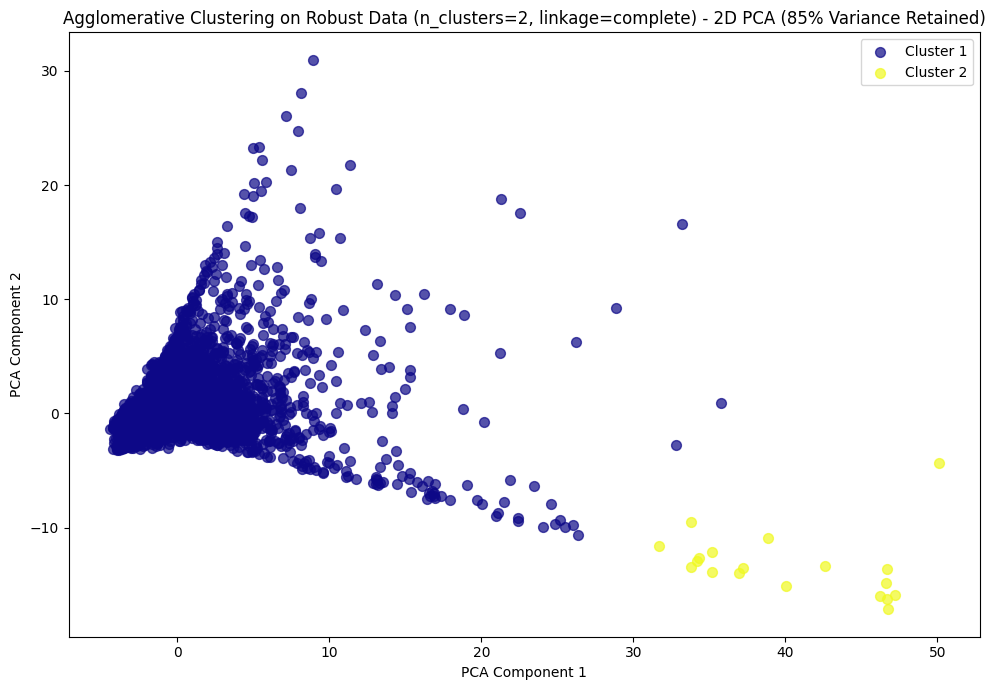

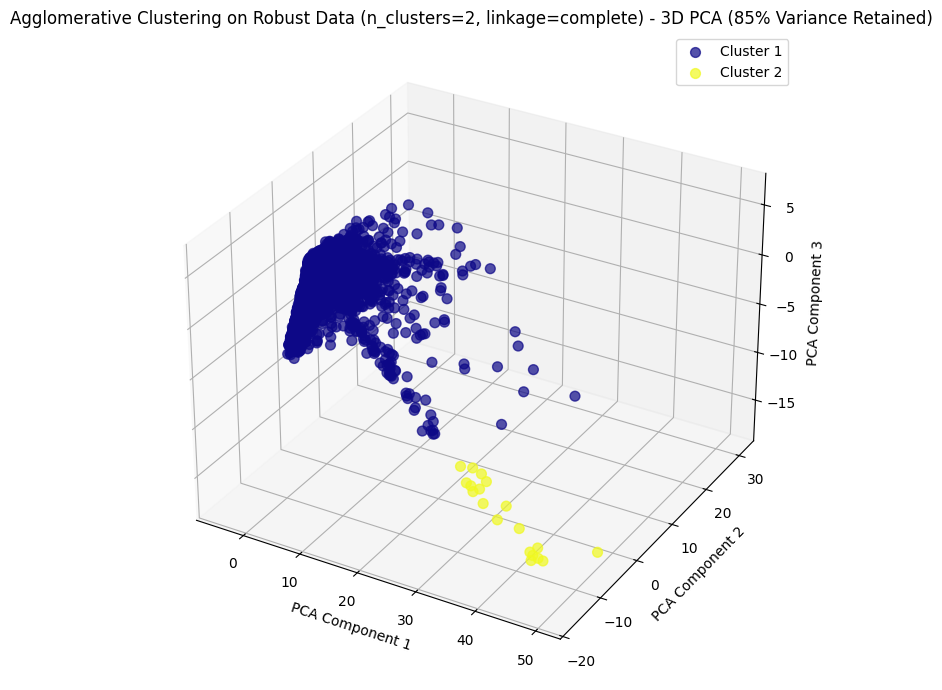

Silhouette Score: 0.8565167793876272
Number of Clusters: 2
Number of Noise Points: 0


In [36]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_best_agglomerative_clusters_optimized_pca(best_agglomerative_data, best_agglomerative_n_clusters, best_agglomerative_linkage, best_agglomerative_title):
    # Perform Agglomerative Clustering with the best parameters
    agglomerative = AgglomerativeClustering(n_clusters=best_agglomerative_n_clusters, linkage=best_agglomerative_linkage)
    labels = agglomerative.fit_predict(best_agglomerative_data)
    
    # Calculate additional metrics
    n_clusters_found = len(set(labels))
    n_noise = list(labels).count(-1)  # Agglomerative Clustering usually doesn’t have noise, but added for consistency
    if n_clusters_found > 1:
        silhouette_avg = silhouette_score(best_agglomerative_data, labels)
    else:
        silhouette_avg = "Not applicable"  # For cases with 1 or no clusters

    # Apply PCA to retain 85% of variance
    pca = PCA(n_components=0.85)
    pca_data = pca.fit_transform(best_agglomerative_data)
    
    # Check if we have enough dimensions for 3D plotting
    if pca_data.shape[1] >= 3:
        pca_3d_data = pca_data[:, :3]  # First three components for 3D
    else:
        pca_3d_data = None  # Not enough dimensions for 3D
        pca_data = pca_data[:, :2]  # Use first two components for 2D

    # 2D Plot
    plt.figure(figsize=(10, 7))
    unique_labels = set(labels)
    colors = plt.cm.get_cmap("plasma", len(unique_labels))
    for label in unique_labels:
        if label == -1:
            color = "black"
            label_text = "Noise"
        else:
            color = colors(label)
            label_text = f"Cluster {label + 1}"
        
        plt.scatter(
            pca_data[labels == label, 0], 
            pca_data[labels == label, 1], 
            s=50, c=[color], label=label_text, alpha=0.7
        )
    
    plt.title(f"Agglomerative Clustering on {best_agglomerative_title} (n_clusters={best_agglomerative_n_clusters}, linkage={best_agglomerative_linkage}) - 2D PCA (85% Variance Retained)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 3D Plot (if available)
    if pca_3d_data is not None:
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        for label in unique_labels:
            if label == -1:
                color = "black"
                label_text = "Noise"
            else:
                color = colors(label)
                label_text = f"Cluster {label + 1}"
            
            ax.scatter(
                pca_3d_data[labels == label, 0],
                pca_3d_data[labels == label, 1],
                pca_3d_data[labels == label, 2],
                s=50, c=[color], label=label_text, alpha=0.7
            )
        
        ax.set_title(f"Agglomerative Clustering on {best_agglomerative_title} (n_clusters={best_agglomerative_n_clusters}, linkage={best_agglomerative_linkage}) - 3D PCA (85% Variance Retained)")
        ax.set_xlabel("PCA Component 1")
        ax.set_ylabel("PCA Component 2")
        ax.set_zlabel("PCA Component 3")
        ax.legend()
        plt.tight_layout()
        plt.show()

    # Return the metrics as separate outputs
    return silhouette_avg, n_clusters_found, n_noise

# Call the function using the best configuration from optimize_agglomerative_all
silhouette_avg, num_clusters, num_noise_points = visualize_best_agglomerative_clusters_optimized_pca(
    best_agglomerative_data, best_agglomerative_n_clusters, best_agglomerative_linkage, best_agglomerative_title
)

# Display the metrics separately
print(f"Silhouette Score: {silhouette_avg}")
print(f"Number of Clusters: {num_clusters}")
print(f"Number of Noise Points: {num_noise_points}")

This graph shows the separation between the clusters; this is crucial in hierarchical clustering, where well-defined distances lead to more interpretable and stable clusters. By addressing the outliers, Robust PCA isolates the core structure of the data distinguishing Cluster 1 from Cluster 2, which made it easier for the clustering model to find meaningful groupings as data points are more compact with thier respective clusters without interference from noise. The PCA also retained 85% of the variance in the original data capturing most of the data information in those two clusters.
AC's hierarchical nature allowed it to handle clusters of varying sizes and densities effectively while also ensuring each cluster was well defined and not affected by noise, which was crucial for this dataset, the adaptability of this model is reflected in the higher silhouette score. AC also provided us with a manageable numbers of clusters unlike other models which makes customer segmetation more intuitive and interpretable allowing us to make derive actionable insights.
This combination of outlier handling, compact and distinct clustering makes this model in particular, the optimal path for achieving effective clustering of the dataset.

---

## Affinity Propagation 
### Optimization

In [37]:
import numpy as np
import pandas as pd
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score

# Function to randomly sample data from either a DataFrame or NumPy array
def random_sample_data(data, frac=0.2, random_state=42):
    np.random.seed(random_state)
    if isinstance(data, pd.DataFrame):
        # If the input is a DataFrame, use the sample method
        return data.sample(frac=frac, random_state=random_state)
    elif isinstance(data, np.ndarray):
        # If the input is a NumPy array, use np.random.choice
        n_samples = int(len(data) * frac)
        sampled_indices = np.random.choice(data.shape[0], size=n_samples, replace=False)
        return data[sampled_indices, :]
    else:
        raise ValueError("Input data should be either a DataFrame or a NumPy array.")

# Function to build and evaluate Affinity Propagation model with sampling and limited iterations
def build_affinity_propagation_model_with_sampling(ap_data, ap_damping_value, ap_title, frac=0.2):
    sampled_ap_data = random_sample_data(ap_data, frac=frac, random_state=42)
    
    # Initialize and fit the Affinity Propagation model with limited iterations
    affinity_model = AffinityPropagation(damping=ap_damping_value, max_iter=200, convergence_iter=15, random_state=42)
    ap_cluster_labels = affinity_model.fit_predict(sampled_ap_data)
    
    # Add the cluster labels to the sampled DataFrame
    if isinstance(sampled_ap_data, np.ndarray):
        df_ap_with_clusters = pd.DataFrame(sampled_ap_data, columns=[f"Feature_{i+1}" for i in range(sampled_ap_data.shape[1])])
    else:
        df_ap_with_clusters = sampled_ap_data.copy()
    df_ap_with_clusters['Cluster'] = ap_cluster_labels

    # Calculate silhouette score
    silhouette_ap_avg = silhouette_score(sampled_ap_data, ap_cluster_labels)

    return df_ap_with_clusters, affinity_model, silhouette_ap_avg

# Function to optimize Affinity Propagation parameters with sampling and limited iterations
def optimize_affinity_propagation_with_sampling(ap_data, ap_damping_range, ap_title, frac=0.2):
    best_ap_damping_value = None
    best_ap_score = -1
    best_ap_model = None
    best_df_ap_with_clusters = None

    for ap_damping_value in ap_damping_range:
        sampled_ap_data = random_sample_data(ap_data, frac=frac, random_state=42)
        affinity_model = AffinityPropagation(damping=ap_damping_value, max_iter=200, convergence_iter=15, random_state=42)
        ap_cluster_labels = affinity_model.fit_predict(sampled_ap_data)
        
        if len(np.unique(ap_cluster_labels)) > 1:
            ap_score = silhouette_score(sampled_ap_data, ap_cluster_labels)
            if ap_score > best_ap_score:
                best_ap_score = ap_score
                best_ap_damping_value = ap_damping_value
                best_ap_model = affinity_model
                if isinstance(sampled_ap_data, np.ndarray):
                    best_df_ap_with_clusters = pd.DataFrame(sampled_ap_data, columns=[f"Feature_{i+1}" for i in range(sampled_ap_data.shape[1])])
                else:
                    best_df_ap_with_clusters = sampled_ap_data.copy()
                best_df_ap_with_clusters['Cluster'] = ap_cluster_labels

    return best_df_ap_with_clusters, best_ap_model, best_ap_score, best_ap_damping_value

# Optimize and store silhouette scores for Affinity Propagation
ap_silhouette_scores = {}

# Example usage on scaled datasets (assuming minmax_df, standard_df, and robust_df are defined)
scaled_datasets_ap = {
    "MinMax Data": minmax_df,
    "Standard Data": standard_df,
    "Robust Data": robust_df
}

ap_damping_range = [0.5, 0.6, 0.7, 0.8, 0.9]

# Store the AP results
ap_results = {}

for ap_title, ap_data in scaled_datasets_ap.items():
    df_ap_with_clusters, affinity_model, ap_score, best_ap_damping_value = optimize_affinity_propagation_with_sampling(ap_data, ap_damping_range, ap_title, frac=0.2)
    ap_silhouette_scores[ap_title] = ap_score
    ap_results[ap_title] = (df_ap_with_clusters, affinity_model, ap_score, best_ap_damping_value)

# Display all Affinity Propagation silhouette scores
print("\nSilhouette Scores for all datasets:")
for ap_title, (df_ap_with_clusters, affinity_model, ap_score, best_ap_damping_value) in ap_results.items():
    print(f"{ap_title} - Best damping value: {best_ap_damping_value}, Best Silhouette Score: {ap_score:.15f}")


Silhouette Scores for all datasets:
MinMax Data - Best damping value: 0.7, Best Silhouette Score: 0.194367914355929
Standard Data - Best damping value: 0.5, Best Silhouette Score: 0.166514342392142
Robust Data - Best damping value: 0.9, Best Silhouette Score: 0.188607964919110


The code aimed to optimize the damping factor over a specified range (0.5, 0.6,...) for each scaled dataset, random sampling on 20% of the data and 'maximum numbers of iterations' was applied to reduce the long runtime and reduce the amount of forced clusters picked up and also preventing infinite looping. 
The relatively low silhouette score across all datasets suggests Affinity Propagation struggled with these datasets possibly due to the overlapping features in the data, the damping factors had a notable effect, especially for Robust Data, where a higher damping (0.9) was beneficial but not enough to get a desirable result. Additionally, the high computational cost even with limitations and random sampling makes this model inefficient with this larger dataset. 

### Model

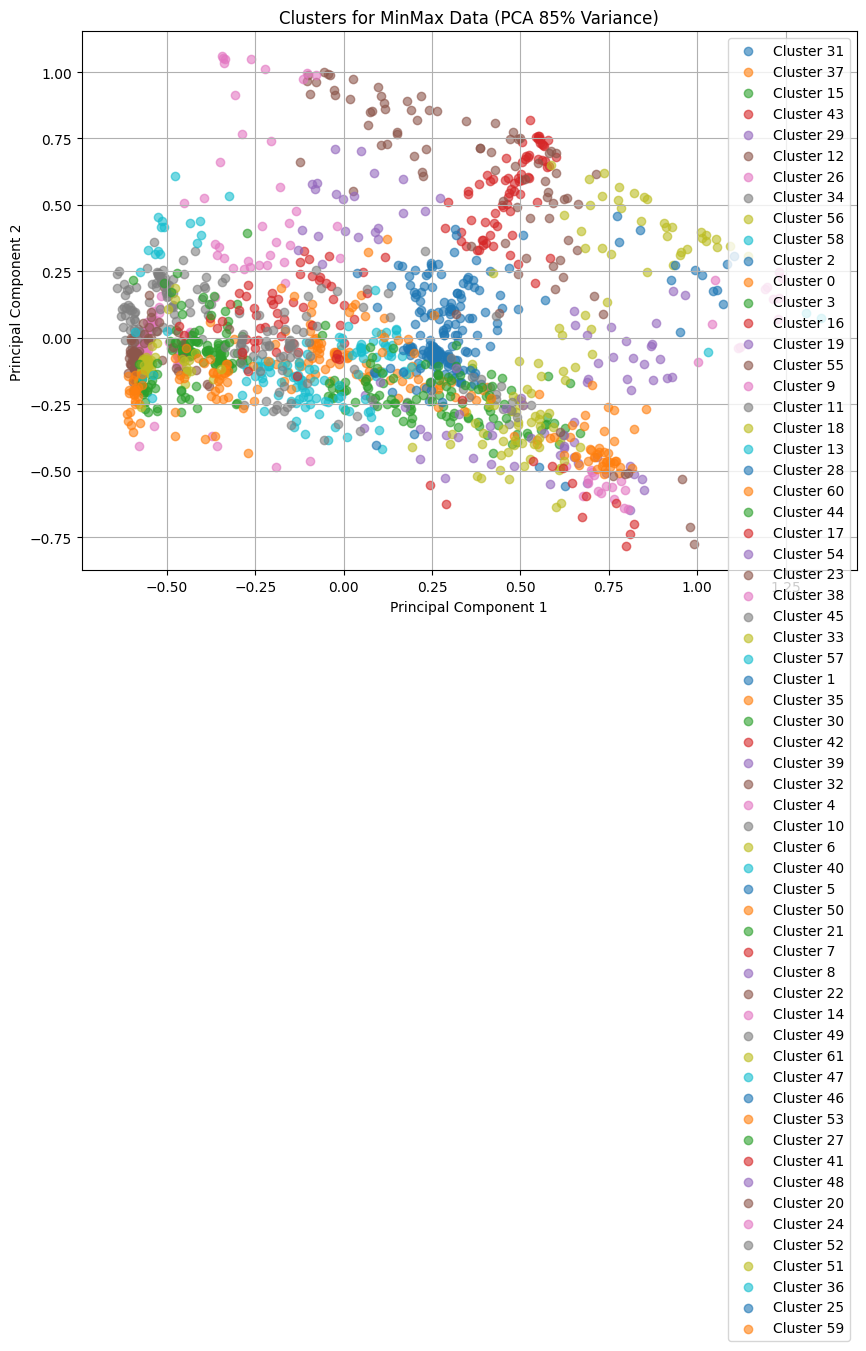

Best Silhouette Score: 0.1944
Number of Clusters: 62


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def visualize_best_affinity_propagation_cluster(ap_results):
    # Identify the dataset with the highest silhouette score
    best_ap_title = max(ap_results, key=lambda x: ap_results[x][2])
    best_df_ap_with_clusters, _, best_ap_score, _ = ap_results[best_ap_title]

    # Get the number of clusters
    n_ap_clusters = best_df_ap_with_clusters['Cluster'].nunique()

    # Apply PCA to retain 85% variance
    pca = PCA(n_components=0.85, random_state=42)
    pca_data = pca.fit_transform(best_df_ap_with_clusters.drop(columns=['Cluster']))

    # Create a DataFrame with PCA components and clusters
    pca_df = pd.DataFrame(pca_data, columns=[f"PC_{i+1}" for i in range(pca_data.shape[1])])
    pca_df['Cluster'] = best_df_ap_with_clusters['Cluster'].values

    # Plot the clusters
    plt.figure(figsize=(10, 7))
    for cluster in pca_df['Cluster'].unique():
        cluster_data = pca_df[pca_df['Cluster'] == cluster]
        plt.scatter(cluster_data['PC_1'], cluster_data['PC_2'], label=f'Cluster {cluster}', alpha=0.6)

    # Customize plot
    plt.title(f"Clusters for {best_ap_title} (PCA 85% Variance)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Return the silhouette score and number of clusters as separate outputs
    return best_ap_score, n_ap_clusters

# Usage
best_ap_silhouette_score, best_ap_n_clusters = visualize_best_affinity_propagation_cluster(ap_results)
print(f"Best Silhouette Score: {best_ap_silhouette_score:.4f}")
print(f"Number of Clusters: {best_ap_n_clusters}")

The AP model showed a high degree of over-segmentation resulting to over 60 clusters making it impossible to interpret and/or use for customers insights. While AP does not require pre-defining the numbers of clusters, it tends to over cluster when working with complex datasets like in this case. From the visual the high numbers of clusters indicate that Affinity Propagation when applied with MinMax PCA data tends to split the data into smaller and insignificant clusters, there also appear to be significant overlap among the clusters which suggests that they are not well-separated which is consistent with the low silhouette scored of 0.2037 indicating that the clusters lacks clear boundaries. In conculsion, even with optimized parameter, AP fails to provide a manageable number of well-defined clusters, making it a poor choice for creating actionable insights.

### Key Takeaways
The models that performed the weakest did not have much shape to their clusters at all. For instance the Mean Shift model had clusters that overlapped over each other but it did not have a compact shape and instead was more of a splatter across the scatterplot visualization. Affinity Propagation was the one model that performed abnormally but was still not selected for other reasons. In addition to the overlap, there are way too many clusters to be considered for usage in curating actionable insights.

One interesting note is that the Standard scaler never had the best performance for any of the models. It is not surprising that this occurred because of the abnormal distribution of the data as a whole which can be seen from the box plot pre-feature engineering. Meanwhile for the models that performed the worst, it was usually the MinMax scaler that had the best score.

The models that performed the best were predominantly using the robust scaler. Additionally, the ones that performed the best in the K-Means, HDBSCAN, Expectation Maximization, and Agglomerative Clustering all had 2 clusters. Further, the 2 clusters had one be significantly larger than the other. While these models all had the robust scaler have a silhouette score in a similar range of approximately mid 0.70s to mid 0.80s, what separated the Agglomerative Clstering modelling was that the second cluster was better separated and formed from the other cluster in the scatterplot. 

However, it is important to note that even the best models still have their flaws. The vast difference in sizing between the two clusters is not ideal as the insights for one cluster will not be as significant as the other due to the smaller one not comprising a very large portion of the customer demographic. But, given how all the models performed entirely, these models presented the best option for usage in crafting actionable insights to the credit card company.


---

# PART 4 - INTERPRETING CLUSTERS

## Model Selected: Agglomerative Clustering using Robust Scaler

Agglomerative Clustering (AC) stands out as the optimal model for this customer segmentation project. Its ability to form well-defined, distinct clusters with minimal overlap ensures that each segment is meaningful and actionable. The model's flexibility in handling varying densities and its resilience to noise make it ideally suited for uncovering valuable insights within this complex dataset. By choosing AC, we can confidently identify and address the unique needs of each customer segment, ultimately enhancing customer satisfaction and engagement.

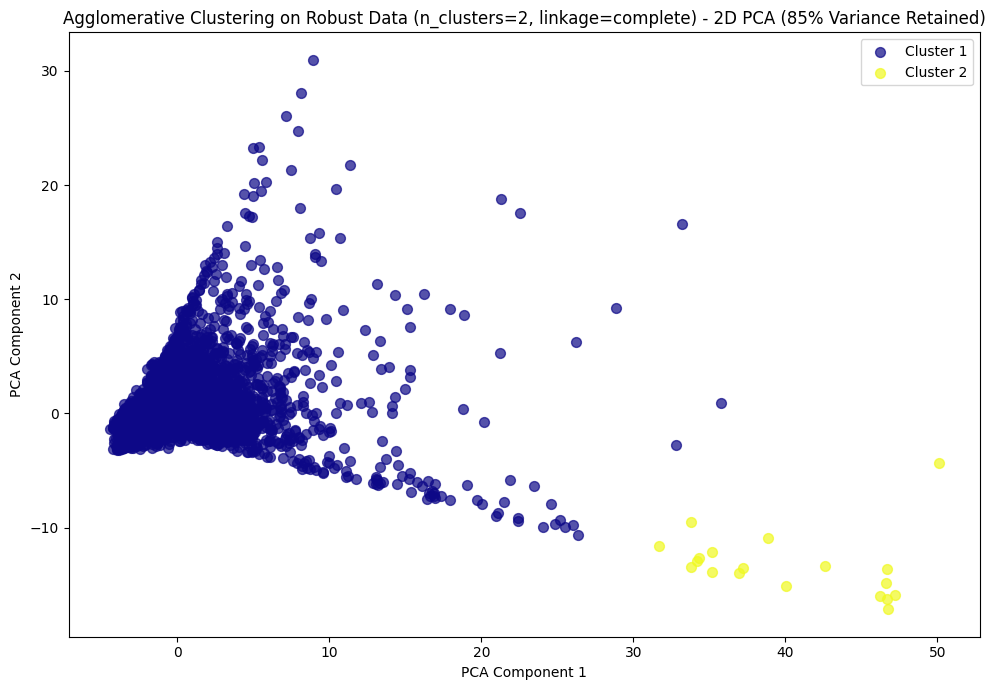

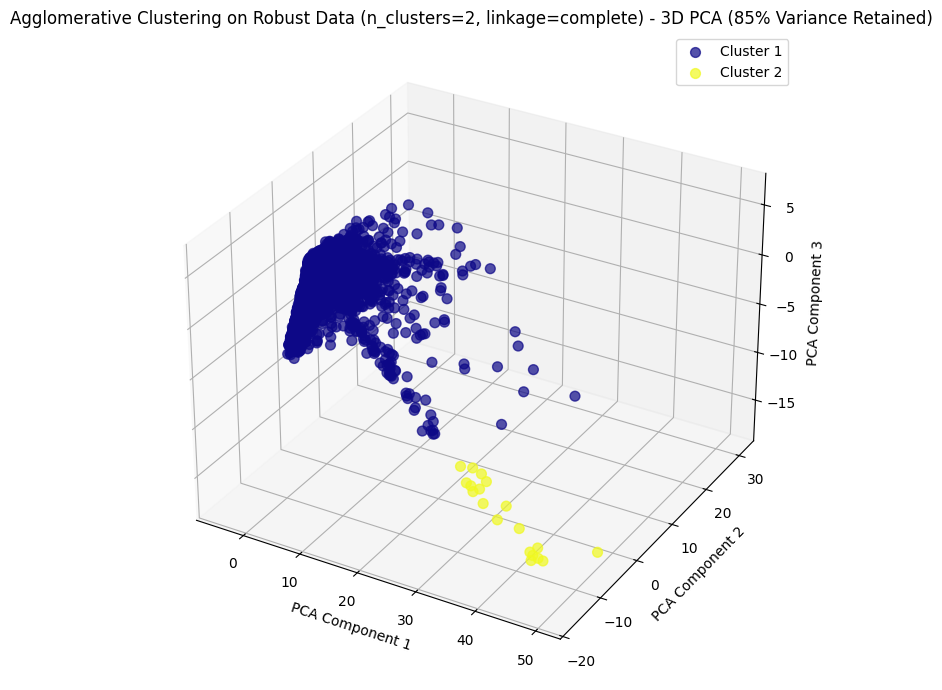

Silhouette Score: 0.8565167793876272
Number of Clusters: 2
Number of Noise Points: 0


In [39]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_best_agglomerative_clusters_optimized_pca(best_agglomerative_data, best_agglomerative_n_clusters, best_agglomerative_linkage, best_agglomerative_title):
    # Perform Agglomerative Clustering with the best parameters
    agglomerative = AgglomerativeClustering(n_clusters=best_agglomerative_n_clusters, linkage=best_agglomerative_linkage)
    labels = agglomerative.fit_predict(best_agglomerative_data)
    
    # Calculate additional metrics
    n_clusters_found = len(set(labels))
    n_noise = list(labels).count(-1)  # Agglomerative Clustering usually doesn’t have noise, but added for consistency
    if n_clusters_found > 1:
        silhouette_avg = silhouette_score(best_agglomerative_data, labels)
    else:
        silhouette_avg = "Not applicable"  # For cases with 1 or no clusters

    # Apply PCA to retain 85% of variance
    pca = PCA(n_components=0.85)
    pca_data = pca.fit_transform(best_agglomerative_data)
    
    # Check if we have enough dimensions for 3D plotting
    if pca_data.shape[1] >= 3:
        pca_3d_data = pca_data[:, :3]  # First three components for 3D
    else:
        pca_3d_data = None  # Not enough dimensions for 3D
        pca_data = pca_data[:, :2]  # Use first two components for 2D

    # 2D Plot
    plt.figure(figsize=(10, 7))
    unique_labels = set(labels)
    colors = plt.cm.get_cmap("plasma", len(unique_labels))
    for label in unique_labels:
        if label == -1:
            color = "black"
            label_text = "Noise"
        else:
            color = colors(label)
            label_text = f"Cluster {label + 1}"
        
        plt.scatter(
            pca_data[labels == label, 0], 
            pca_data[labels == label, 1], 
            s=50, c=[color], label=label_text, alpha=0.7
        )
    
    plt.title(f"Agglomerative Clustering on {best_agglomerative_title} (n_clusters={best_agglomerative_n_clusters}, linkage={best_agglomerative_linkage}) - 2D PCA (85% Variance Retained)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 3D Plot (if available)
    if pca_3d_data is not None:
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        for label in unique_labels:
            if label == -1:
                color = "black"
                label_text = "Noise"
            else:
                color = colors(label)
                label_text = f"Cluster {label + 1}"
            
            ax.scatter(
                pca_3d_data[labels == label, 0],
                pca_3d_data[labels == label, 1],
                pca_3d_data[labels == label, 2],
                s=50, c=[color], label=label_text, alpha=0.7
            )
        
        ax.set_title(f"Agglomerative Clustering on {best_agglomerative_title} (n_clusters={best_agglomerative_n_clusters}, linkage={best_agglomerative_linkage}) - 3D PCA (85% Variance Retained)")
        ax.set_xlabel("PCA Component 1")
        ax.set_ylabel("PCA Component 2")
        ax.set_zlabel("PCA Component 3")
        ax.legend()
        plt.tight_layout()
        plt.show()

    # Return the metrics as separate outputs
    return silhouette_avg, n_clusters_found, n_noise

# Call the function using the best configuration from optimize_agglomerative_all
silhouette_avg, num_clusters, num_noise_points = visualize_best_agglomerative_clusters_optimized_pca(
    best_agglomerative_data, best_agglomerative_n_clusters, best_agglomerative_linkage, best_agglomerative_title
)

# Display the metrics separately
print(f"Silhouette Score: {silhouette_avg}")
print(f"Number of Clusters: {num_clusters}")
print(f"Number of Noise Points: {num_noise_points}")

## Characterize the clusters formed: What kind of customers fall into each cluster? What features are most significant in distinguishing between clusters?

Ultimately the choice was between this model and the HDBSCAN with the robust data scaler. Both share very similar characteristics. Each of the models have 2 clusters with one being significantly larger than the other. However, what made this one the better choice was that it had a slightly higher silhouette score at 0.86 compared to the HDBSCAN's 0.76. While K-Means and Expectation Maximization's best models did score in the same range as the HDBSCAN, the reason why those two were not considered as strong candidates was because of the lack of separation between their clusters. This lack of spacing would make it difficult to segment the customers for the purposes of providing distinct actionable recommendations to different audiences within the dataset.

In [40]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Step 1: Scaling and Clustering with Agglomerative Clustering
agglomerative_scaler = RobustScaler().fit(df_winsorized)
best_agglomerative_data = agglomerative_scaler.transform(df_winsorized)  # Scaled data for clustering

# Apply Agglomerative Clustering with chosen parameters
agglomerative_n_clusters = 2  # Set the desired number of clusters
agglomerative_linkage = 'complete'  # Set linkage method ('ward', 'complete', 'average', 'single')
agglomerative_clusterer = AgglomerativeClustering(n_clusters=agglomerative_n_clusters, linkage=agglomerative_linkage)
agglomerative_labels = agglomerative_clusterer.fit_predict(best_agglomerative_data)  # Labels now contain the cluster assignments

# Step 2: Inverse Transform to Original Scale
best_agglomerative_data_original_scale = agglomerative_scaler.inverse_transform(best_agglomerative_data)

# Step 3: Create a DataFrame with the original feature names and the Agglomerative Clustering labels
agglomerative_feature_names = df_winsorized.columns
best_agglomerative_data_with_clusters = pd.DataFrame(best_agglomerative_data_original_scale, columns=agglomerative_feature_names)
best_agglomerative_data_with_clusters['Cluster'] = agglomerative_labels

# Step 4: Calculate the mean values of each feature for each cluster
agglomerative_cluster_characteristics = best_agglomerative_data_with_clusters.groupby('Cluster').mean()

# Display characteristics side by side
# Reset index to have 'Cluster' as a column and rename for clarity
agglomerative_cluster_characteristics = agglomerative_cluster_characteristics.T  # Transpose for side-by-side comparison
agglomerative_cluster_characteristics.columns = [f'Cluster {col}' for col in agglomerative_cluster_characteristics.columns]  # Rename columns

# Display the side-by-side characteristics table
print("Agglomerative Cluster Characteristics Side by Side:")
print(agglomerative_cluster_characteristics)

Agglomerative Cluster Characteristics Side by Side:
                              Cluster 0     Cluster 1
balance                     1591.340362   5430.989147
balance_frequency              0.894804      1.000000
purchases                    965.296908   1036.835789
installments_purchases       418.576870    965.503684
cash_advance                 990.824629    872.917494
purchases_frequency            0.495946      0.520335
oneoff_purchases_frequency     0.206285      0.035088
cash_advance_frequency         0.137763      0.065789
credit_limit                4518.385532   5518.421053
payments                    1774.562094   1330.869901
minimum_payments             785.239252  30230.938014
prc_full_payment               0.159655      0.000000


## Visualizing the Customer Segments from the Clusters
### Bar Graphs for Both Clusters

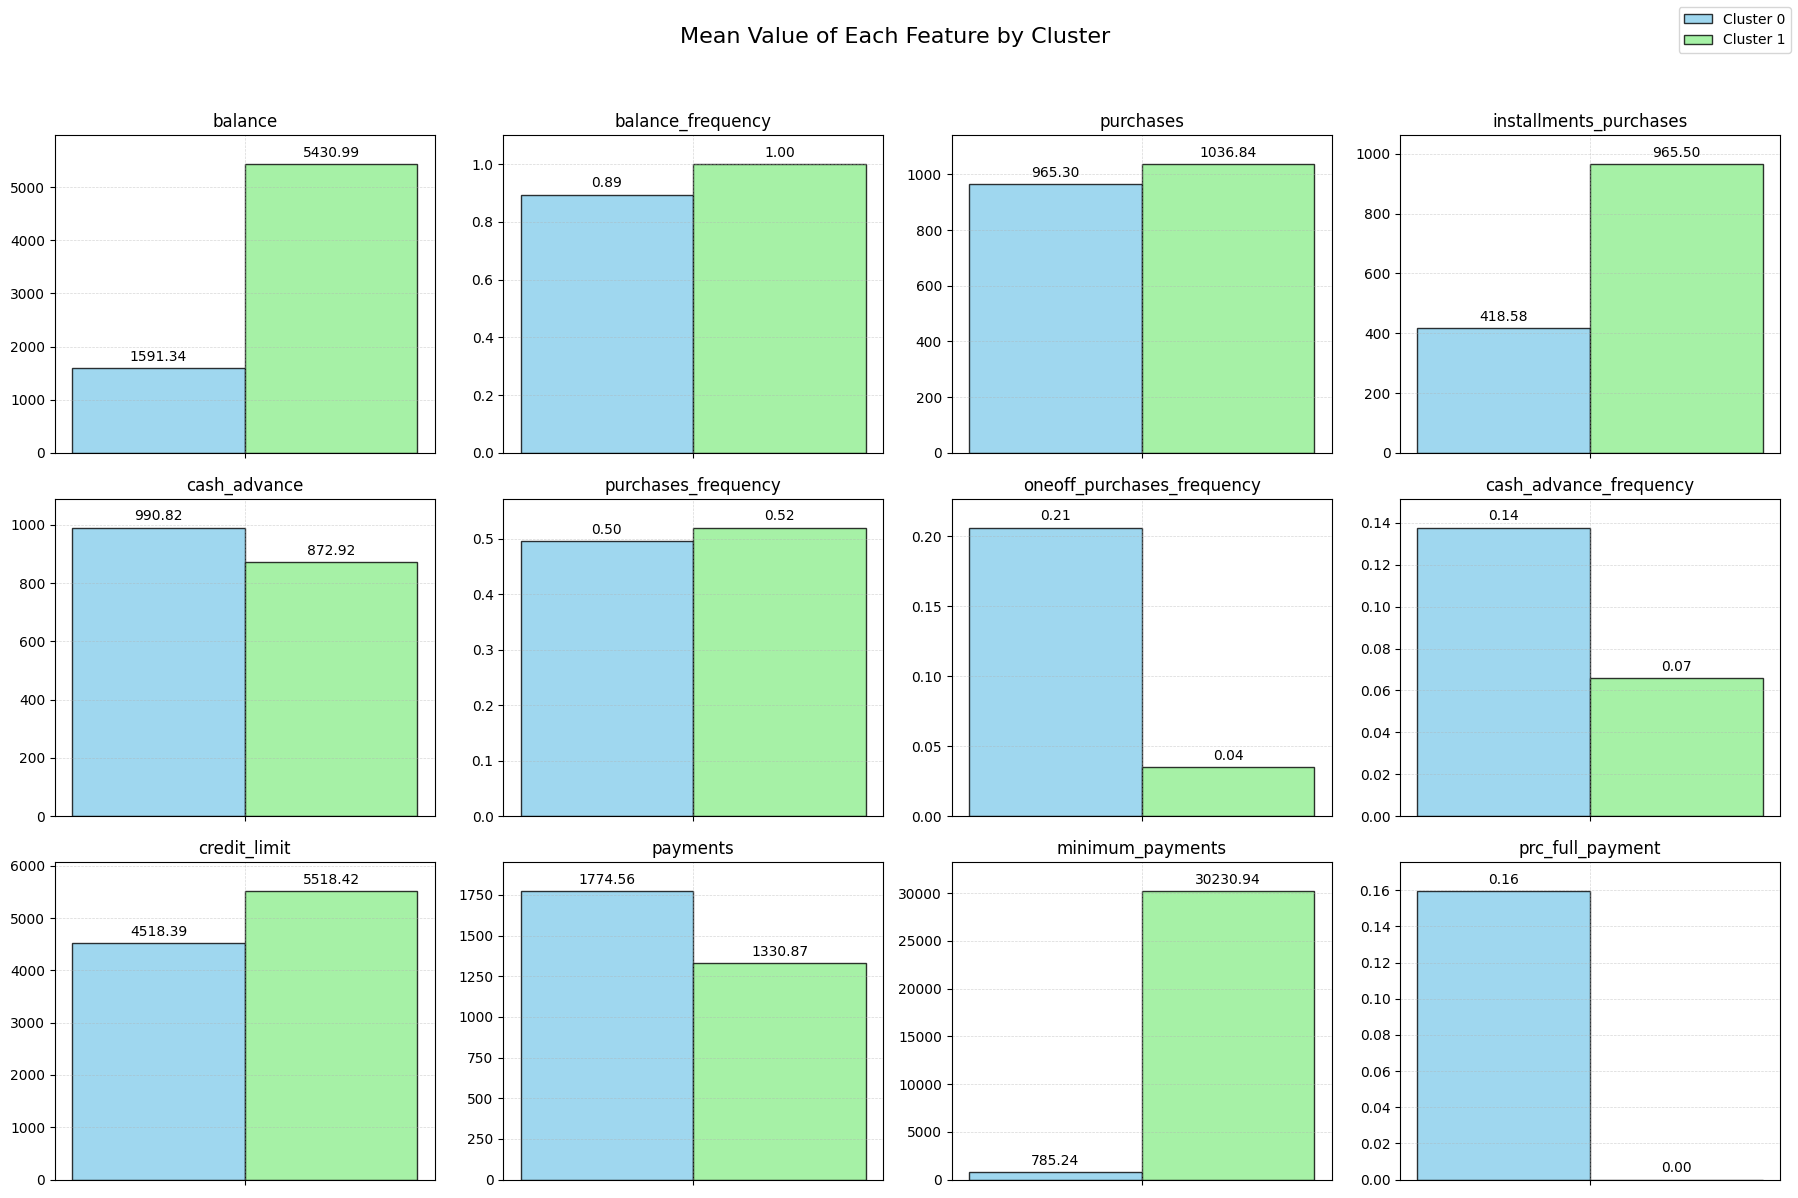

In [41]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid_feature_comparisons(agglomerative_cluster_characteristics):
    # Assuming the first column is Cluster 0 and the second column is Cluster 1
    cluster_0 = agglomerative_cluster_characteristics['Cluster 0']
    cluster_1 = agglomerative_cluster_characteristics['Cluster 1']
    
    # Extract feature names
    features = agglomerative_cluster_characteristics.index
    num_features = len(features)
    
    # Set up a 3x4 grid of subplots
    rows, cols = 3, 4
    fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
    axes = axes.flatten()  # Flatten the axes array for easy iteration
    
    # Loop over each feature and plot on the respective subplot
    for idx, feature in enumerate(features):
        cluster_0_val = cluster_0[feature]
        cluster_1_val = cluster_1[feature]
        
        # Positions for Cluster 0 and Cluster 1
        x = np.arange(1)  # Single position for each subplot
        width = 0.3  # Width of the bars

        # Plot bars right next to each other
        bar1 = axes[idx].bar(x - width / 2, [cluster_0_val], width, label='Cluster 0', color='skyblue', alpha=0.8, edgecolor='black')
        bar2 = axes[idx].bar(x + width / 2, [cluster_1_val], width, label='Cluster 1', color='lightgreen', alpha=0.8, edgecolor='black')

        # Add data labels with a smaller font size
        for bar in bar1 + bar2:
            height = bar.get_height()
            axes[idx].annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                               xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', 
                               fontsize=10, color='black')

        # Set y-axis limit to 110% of the max value for the feature
        max_val = max(cluster_0_val, cluster_1_val)
        axes[idx].set_ylim(0, max_val * 1.1)  # Increase y-axis limit by 10%

        # Add titles and labels
        axes[idx].set_title(f"{feature}", fontsize=12)
        axes[idx].set_xticks([0])
        axes[idx].set_xticklabels([''])  # Leave empty to avoid extra ticks
        axes[idx].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
    
    # Hide any unused subplots
    for idx in range(num_features, len(axes)):
        fig.delaxes(axes[idx])

    # Add legend and adjust layout
    fig.suptitle("Mean Value of Each Feature by Cluster", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    fig.legend(['Cluster 0', 'Cluster 1'], loc='upper right', fontsize=10)
    plt.show()

# Call the function to plot grid feature comparisons
plot_grid_feature_comparisons(agglomerative_cluster_characteristics)

### Histograms of Both Clusters

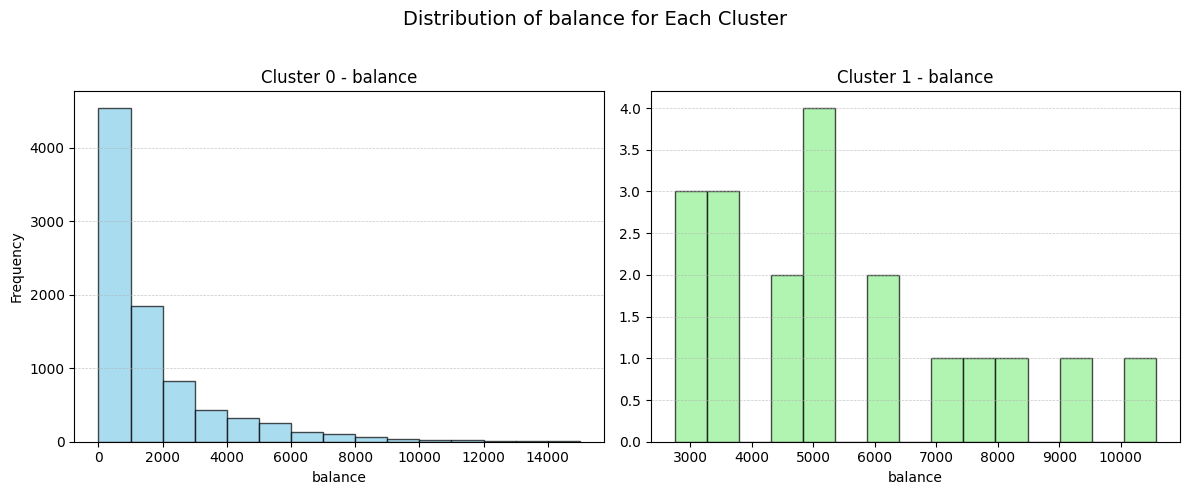

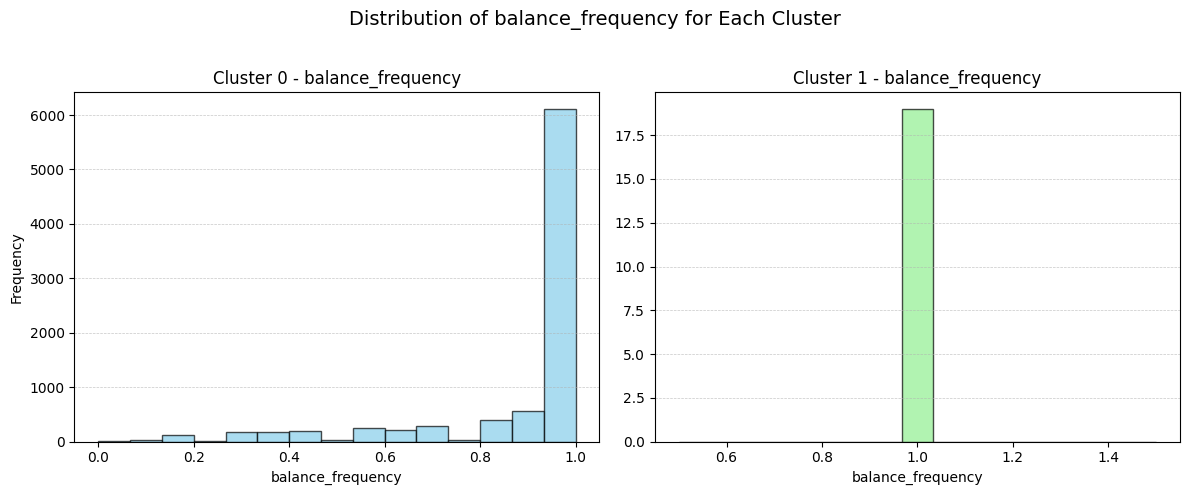

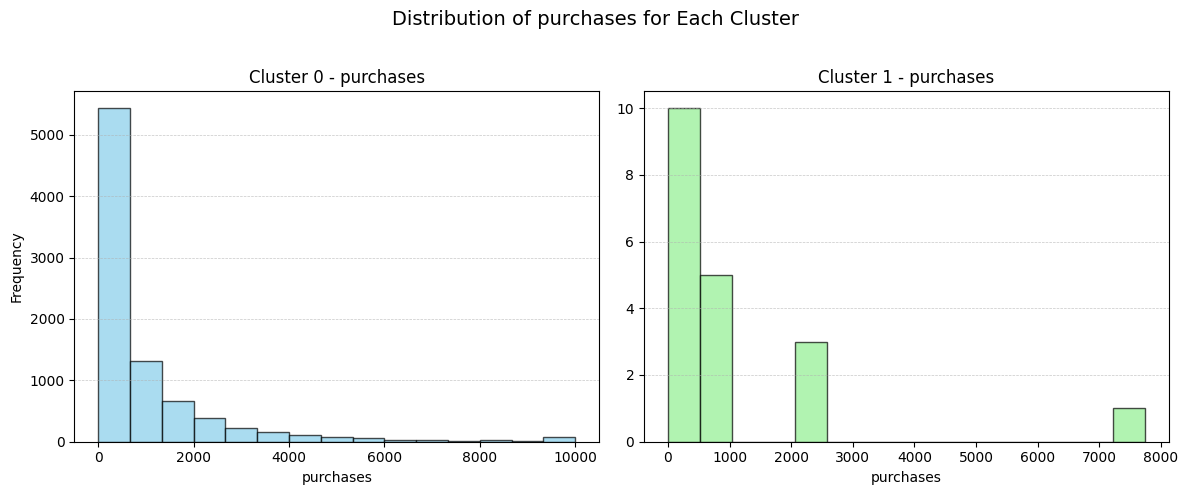

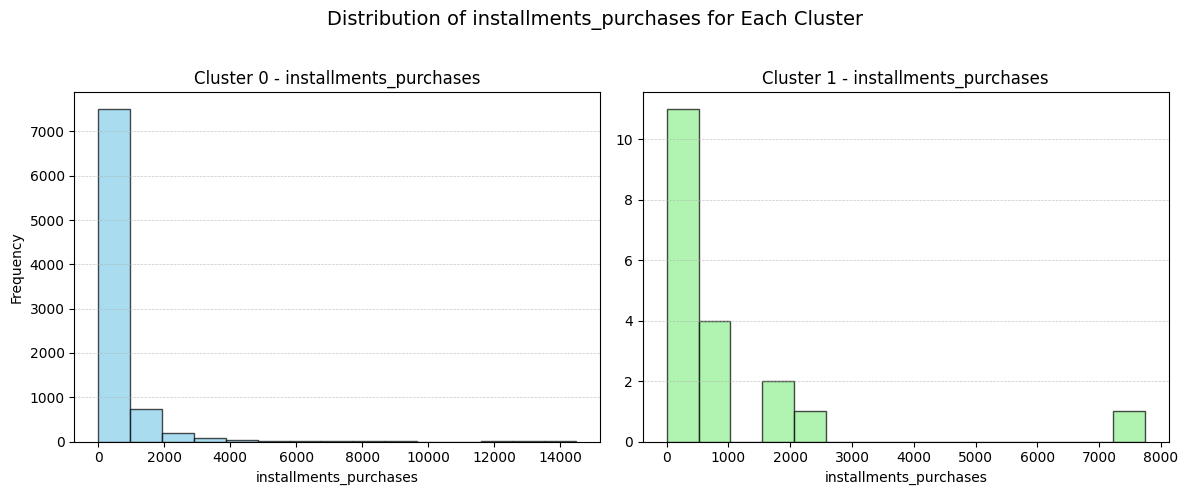

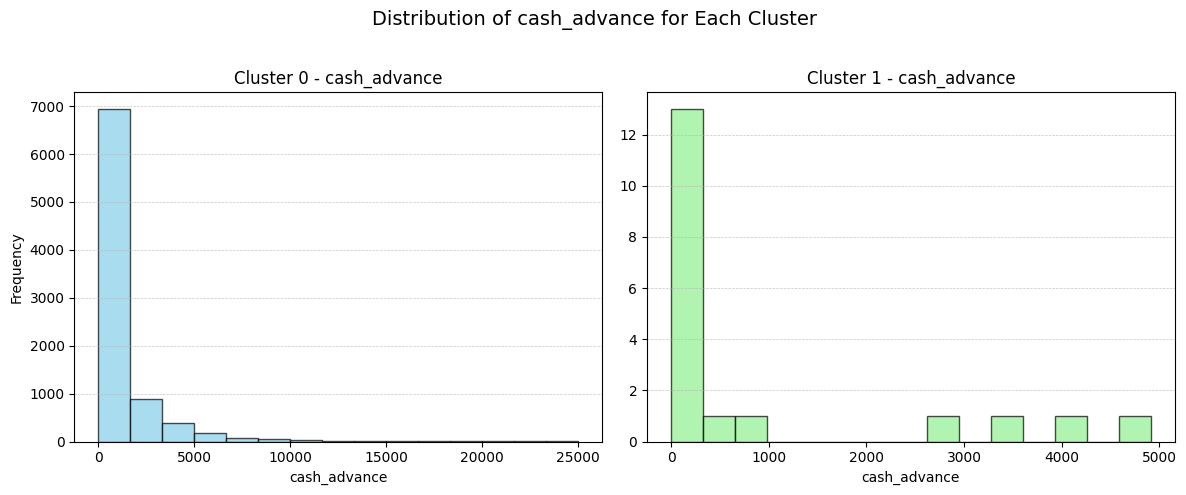

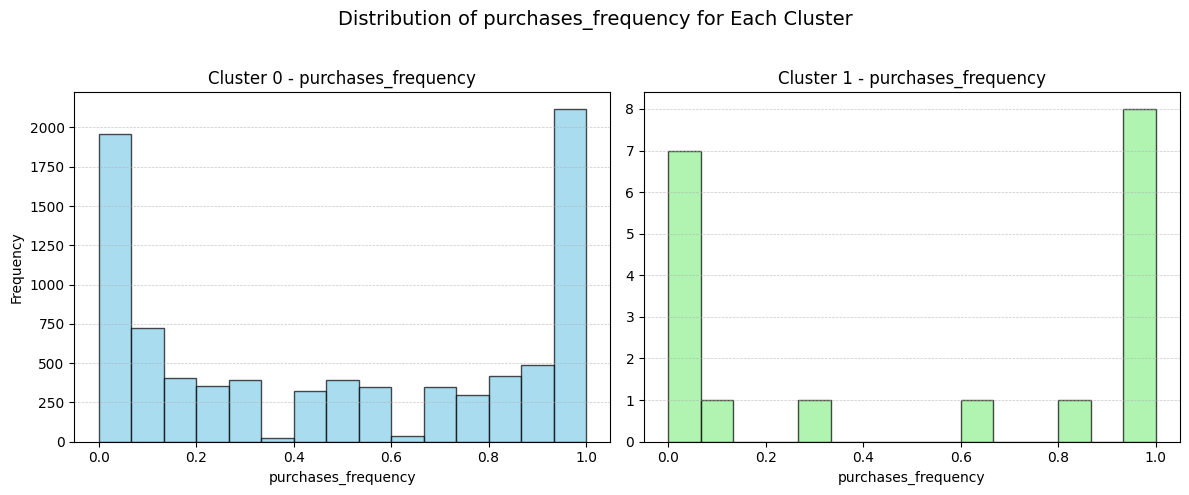

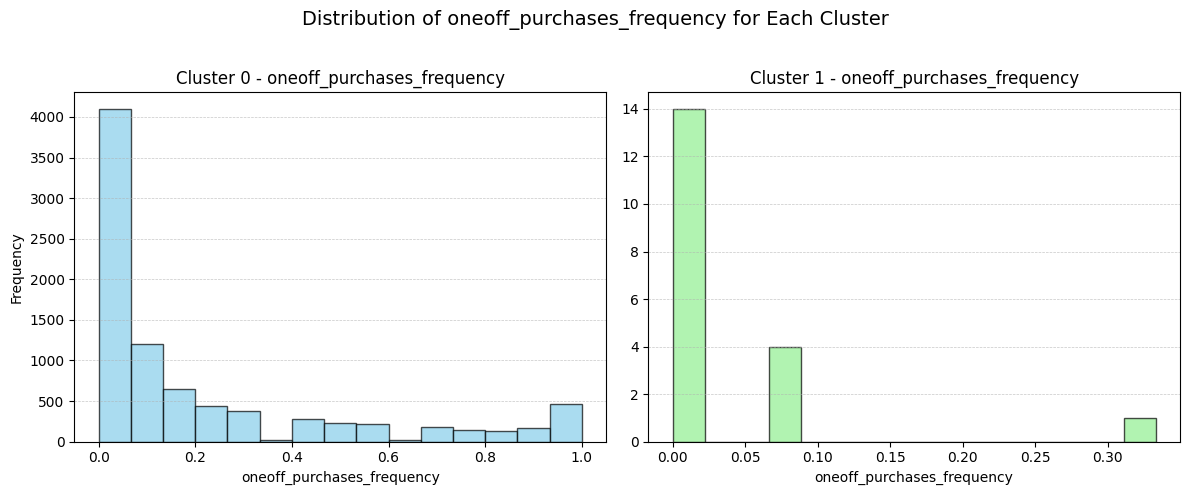

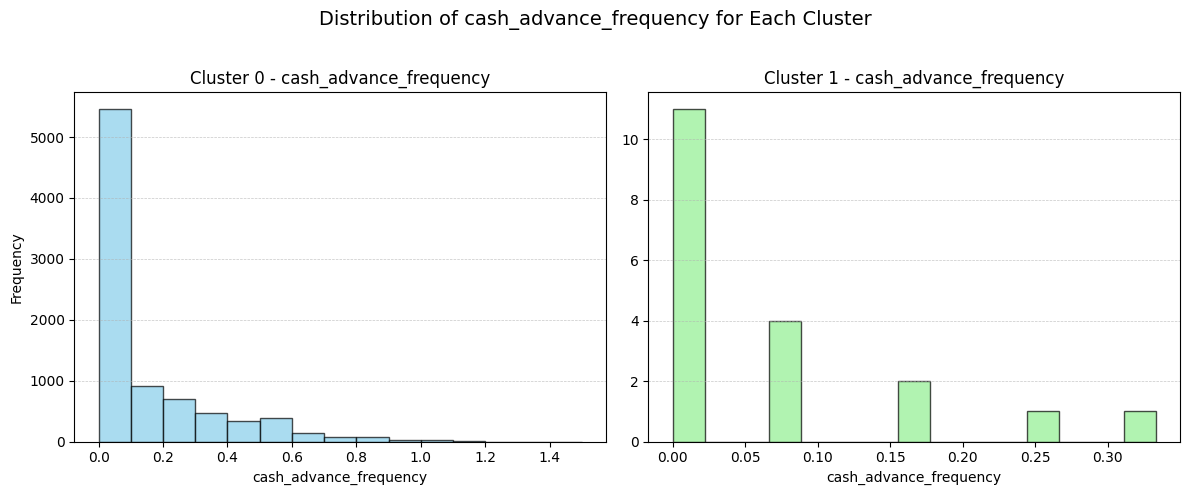

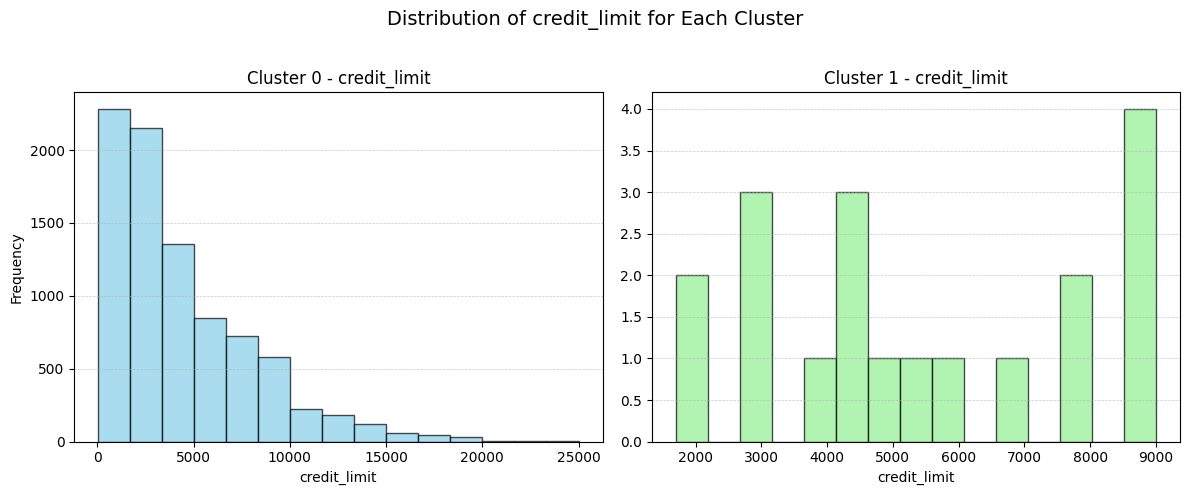

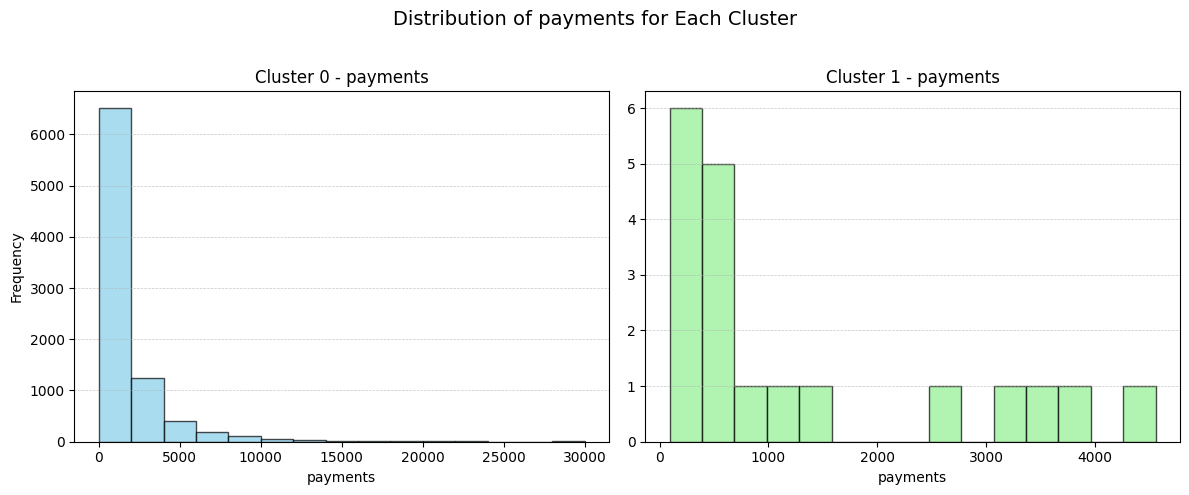

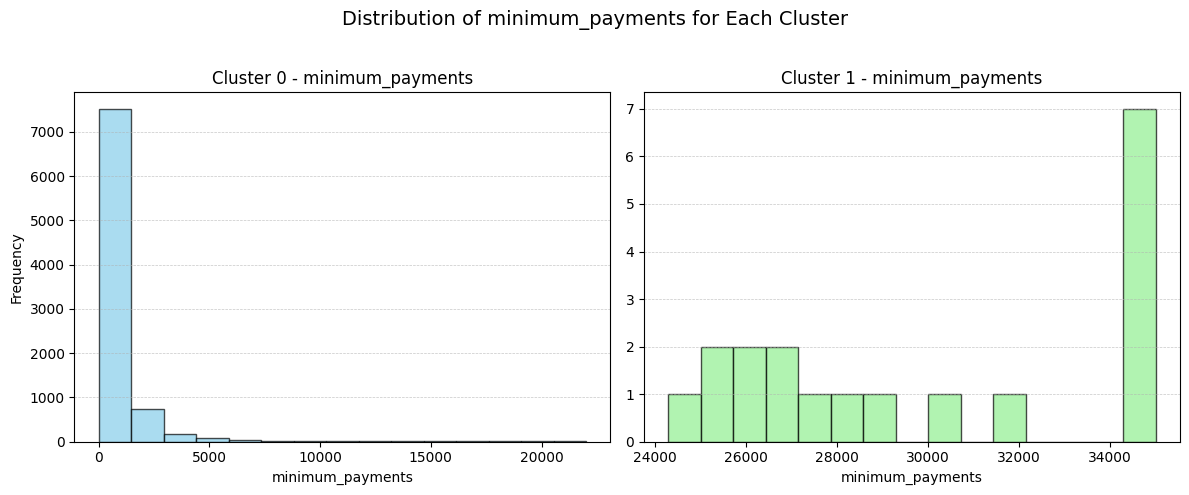

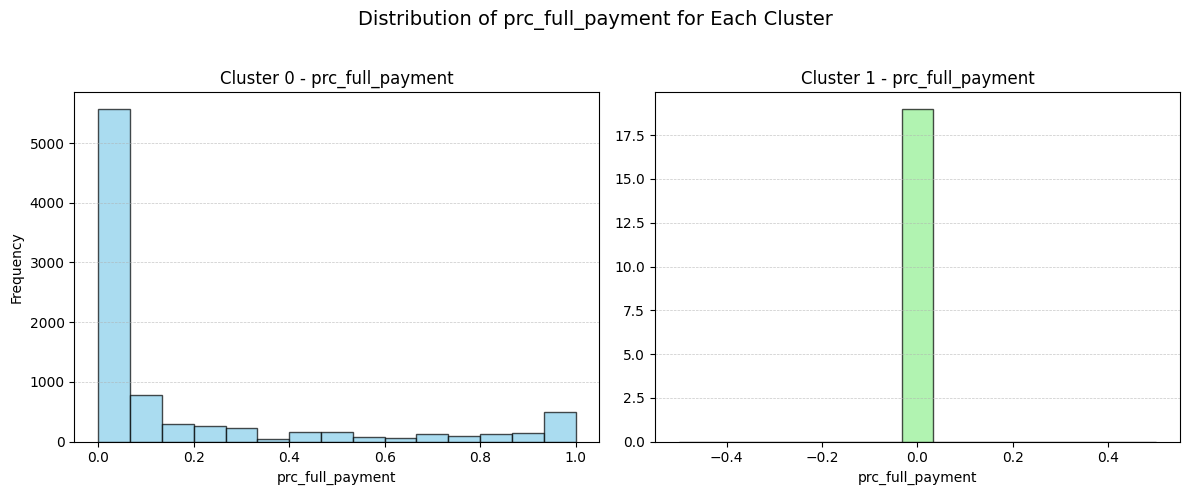

In [42]:
import matplotlib.pyplot as plt

def plot_side_by_side_feature_histograms(agglomerative_data_with_clusters):
    # Get the feature columns (exclude the 'Cluster' column)
    feature_names = agglomerative_data_with_clusters.columns.drop('Cluster')

    # Loop through each feature to plot side-by-side histograms
    for feature in feature_names:
        # Set up a figure with 1 row and 2 columns for side-by-side plots
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot histogram for Cluster 0
        axes[0].hist(
            agglomerative_data_with_clusters[agglomerative_data_with_clusters['Cluster'] == 0][feature],
            bins=15, alpha=0.7, color='skyblue', edgecolor='black'  # Added black borders
        )
        axes[0].set_title(f"Cluster 0 - {feature}")
        axes[0].set_xlabel(feature)
        axes[0].set_ylabel("Frequency")
        axes[0].grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

        # Plot histogram for Cluster 1
        axes[1].hist(
            agglomerative_data_with_clusters[agglomerative_data_with_clusters['Cluster'] == 1][feature],
            bins=15, alpha=0.7, color='lightgreen', edgecolor='black'  # Added black borders
        )
        axes[1].set_title(f"Cluster 1 - {feature}")
        axes[1].set_xlabel(feature)
        axes[1].grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

        # Adjust layout for readability
        fig.suptitle(f"Distribution of {feature} for Each Cluster", fontsize=14)
        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to fit the suptitle
        plt.show()

# Call the function to plot side-by-side histograms for each feature
plot_side_by_side_feature_histograms(best_agglomerative_data_with_clusters)

The various histograms provide insightful comparisons of different creidt usage metrics across the two clusters. Cluster 0, as seen in each plot, represents a large group with high frequency but lower value transactions across most categries, such as balance, purchases, cash advances, and installments. This suggests that Cluster 0 users are low-spending, high-frequency individuals who may rely on their credit cards for smaller regular transactions rather than large purchases. 
In contrast, Cluster 1 shows a smaller number of individuals, yet with significantly higher values in metrics like balance, installments, and cash advances. For example, Cluster 1 has a higher values indicating higher debt. Cluster 1's also has a more varied distribution, indicating that these users might engage in a broader range of spending behaviours compared to the spending patterns seen in Cluster 0. In conclusion, these histograms suggest two distinct user groups: Cluster 0 consists of broad base of low-spending, while Cluster 1 consists of frequent users and a smaller, high-utilization group. This segmentation will help us in deriving actionable insights for future questions.

Overall, the characteristics of each cluster have quite a bit of overlap. The two customer segments are similar in their balance frequency, purchase frequency, cash advances, purchases, credit limits, and payments. However, there is significant contrast in a few key categories. The two clustered customer segments differ strongly in their balances, installment purchases, one-off purchase frequency, cash advance frequency, payments, minimum payments, and % of full payments comprising their total purchases. As the most significant differentiation between the two segments is with minimum payments, installment purchases, and balance, these will be influential in the business recommendations put forth in the "Actionable Insights" section later on in the notebook.

---

# PART 5 - ACTIONABLE INSIGHTS

- Provide business recommendations based on the clusters formed. How would you target different customer segments?

Based on the model selected, there were 2 clusters formed. While one of the clusters is significantly larger than the other, these make up two very different audiences so there can be different recommendations for each.

Highlighting the characteristics of our two clusters generated, we can provide various business recommendations that can be tailored to match the characteristics given. 

Reiterating the key characteristics where the larger cluster (cluster 0) has customers who generally keep a lower balance, higher volume of one off purchases and as well have a higher frequency of bill payments, we can market specific credit card products that would be most suitable for the group. Additionally, for our smaller cluster (cluster 1) being composed of customers with the characteristics of having higher balances, installment purchases, credit limits, and minimum payments, we can offer credit products that would best compliment their spending habits as well.

Cluster 0:

For Cluster 0, the customers segmented within can be characterized as lower to middle income clients who make moderate level purchases, utilize higher volumes of cash advances, and also maintains lower levels of available credit. As the majority of our dataset falls within the characteristics of this cluster, we can provide the recommendation to market more generalized credit cards similar to TD's Reward points or a Cash back cards to further benefit their purchasing habits. This will encourage increased card utilization and target the segmented customers with purchase incentives such as cashback offers or points programs to encourage more spending and particularly aid in increasing their available balances. Additionally, offering balance transfer options with low-interest rates and category specific bonuses for credit card usage such as for dining and travel purchases can enable increased engagement. Overall, with ongoing promotions that are geared towards these general benefits, it will also attract clients with similar attributes and drive customer retention and loyalty.


Cluster 1:

For Cluster 1, the customers categorized within this cluster can be characterized as niche higher income status clients who carry high available balances which may suggest they either spend less frequently or have high credit limits that are not fully utilized. In terms of business recommendations for this cluster demographic, we can offer credit card products with programs that include exclusive premium offers and luxury benefits to incentivize higher credit card utilization. Examples of card tiers that would be applicable to market to this cluster would be cards such as the AMEX's Platinum card or TD's Aeroplan Infinite. By promoting premium credit card products with benefits such as concierge services, travel perks or higher points or cashback rates, this will ultimately increase loyalty and engagement to increase the cluster's utilization rate. Furthermore, by incentivizing this cluster to target making larger purchases, more offers can be applied thus further attracting new clients who would optimally benefit from this.



Conclusion:

In conclusion given our two clusters generated throughout our analysis, our business recommendations to target Cluster 0 would be to focus on marketing credit cards that reward general day to day purchasing and offer incentives that would enable overall increased credit utilization and engagement provided with cards such as Cash Back or Rewards cards. For Cluster 1, our recommendation is to promote more high tiered luxury cards that would encourage credit utilization for larger purchases and offer promotions where clients are required to spend a specific amount of credit within a range of time to be eligible to obtain greater travel or point rewards provided with products such as Infinite or Platinum level cards. By targeting each customer segment with the strategies provided, customer engagement, increased card usage, and high-value customer retention can be maximized within the credit card industry.